# Импорты

In [16]:
from collections.abc import Iterable
from typing import Any

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, KFold, ParameterGrid, train_test_split
from sklearn.pipeline import FunctionTransformer, Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from tqdm import tqdm
import seaborn as sns
import dataframe_image as dfi
from src.features import numeric_features, categorical_features

from src import business, modeling, transforms, vis
from src.const import DATA_PATH, DATA_TEST_PATH, TARGET, DATA_TEST_TARGETS_PATH

# Для более качественных графиков
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 150
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
loan_data = pd.read_csv(DATA_PATH)
loan_data.head(2)

лимит_нарушен  пол  тип  цель  кредитоспособность  другие_кредиты  бизнес  \
0            0.0    м  3.0   0.0                 1.0             NaN     0.0   
1            0.0  NaN  NaN   0.0                 1.0             0.0     0.0   

           сумма    сбор        срок  ...  один_платеж  стоимость_имущества  \
0  174765.264968  normal  245.885949  ...          0.0        244488.111841   
1            NaN    want  365.885949  ...          0.0                  NaN   

   проживание  тип_залога тип_кредита кредитный_рейтинг  возраст  \
0         осн         дом         2.0        709.508335    55-64   
1         осн         дом         1.0        722.508335    55-64   

   прямой_залог дефолт                                               речь  
0           1.0      0  "Hey there! I’m a guy with a solid job and a m...  
1           NaN      0  "Hi there! We are a couple with a solid financ...  

[2 rows x 22 columns]

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   лимит_нарушен        6462 non-null   float64
 1   пол                  3778 non-null   object 
 2   тип                  6466 non-null   float64
 3   цель                 6442 non-null   float64
 4   кредитоспособность   6406 non-null   float64
 5   другие_кредиты       6425 non-null   float64
 6   бизнес               6369 non-null   float64
 7   сумма                6414 non-null   float64
 8   сбор                 8000 non-null   object 
 9   срок                 6376 non-null   float64
 10  амортизация          6338 non-null   float64
 11  только_процент       6435 non-null   float64
 12  один_платеж          6396 non-null   float64
 13  стоимость_имущества  5790 non-null   float64
 14  проживание           8000 non-null   object 
 15  тип_залога           8000 non-null   o

In [9]:
loan_data.describe()

лимит_нарушен          тип         цель  кредитоспособность  \
count    6462.000000  6466.000000  6442.000000          6406.00000   
mean        0.065305     2.664089     1.118131             0.96113   
std         0.247082     0.653671     1.138390             0.19330   
min         0.000000     1.000000     0.000000             0.00000   
25%         0.000000     3.000000     0.000000             1.00000   
50%         0.000000     3.000000     1.000000             1.00000   
75%         0.000000     3.000000     2.000000             1.00000   
max         1.000000     3.000000     3.000000             1.00000   

       другие_кредиты       бизнес         сумма         срок  амортизация  \
count     6425.000000  6369.000000  6.414000e+03  6376.000000  6338.000000   
mean         0.004669     0.134715  3.484416e+05   340.620736     0.101925   
std          0.068178     0.341446  1.842944e+05    59.079085     0.302573   
min          0.000000     0.000000  4.476526e+04   101.885949     0.000000   
25%          0.000000     0.000000  2.147653e+05   365.885949     0.000000   
50%          0.000000     0.000000  3.147653e+05   365.885949     0.000000   
75%          0.000000     0.000000  4.522653e+05   365.885949     0.000000   
max          1.000000     1.000000  3.024765e+06   365.885949     1.000000   

       только_процент  один_платеж  стоимость_имущества  тип_кредита  \
count     6435.000000  6396.000000         5.790000e+03  6340.000000   
mean         0.050971     0.019856         5.386556e+05     2.148580   
std          0.219956     0.139517         3.607842e+05     0.986423   
min          0.000000     0.000000         7.448811e+04     1.000000   
25%          0.000000     0.000000         3.144881e+05     1.000000   
50%          0.000000     0.000000         4.544881e+05     2.000000   
75%          0.000000     0.000000         6.644881e+05     3.000000   
max          1.000000     1.000000         4.914488e+06     4.000000   

       кредитный_рейтинг  прямой_залог       дефолт  
count        6386.000000   6420.000000  8000.000000  
mean          710.309933      0.999844     0.236750  
std           115.213366      0.012481     0.425114  
min           511.508335      0.000000     0.000000  
25%           611.508335      1.000000     0.000000  
50%           708.508335      1.000000     0.000000  
75%           810.508335      1.000000     0.000000  
max           911.508335      1.000000     1.000000

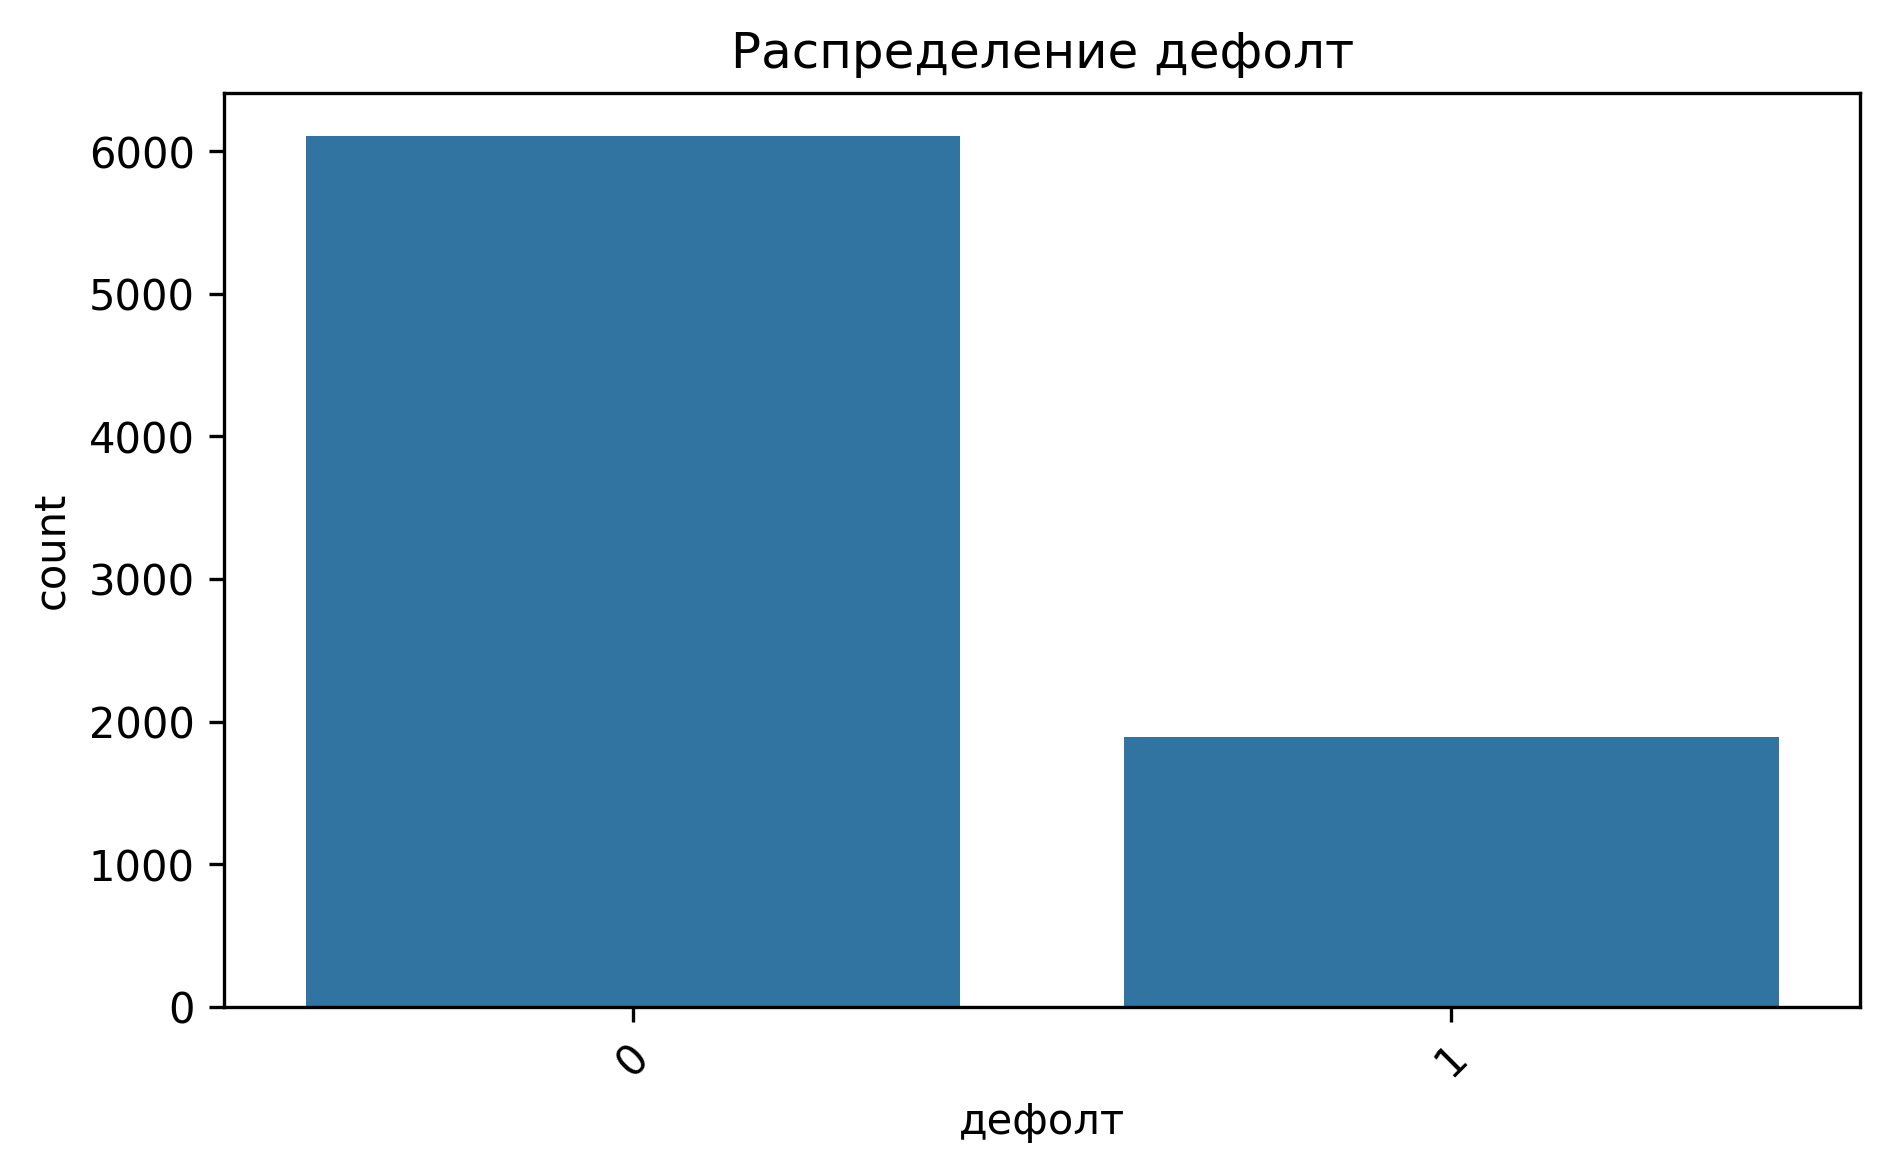

In [10]:
vis.plot_categorical_distributions(loan_data, ["дефолт"])

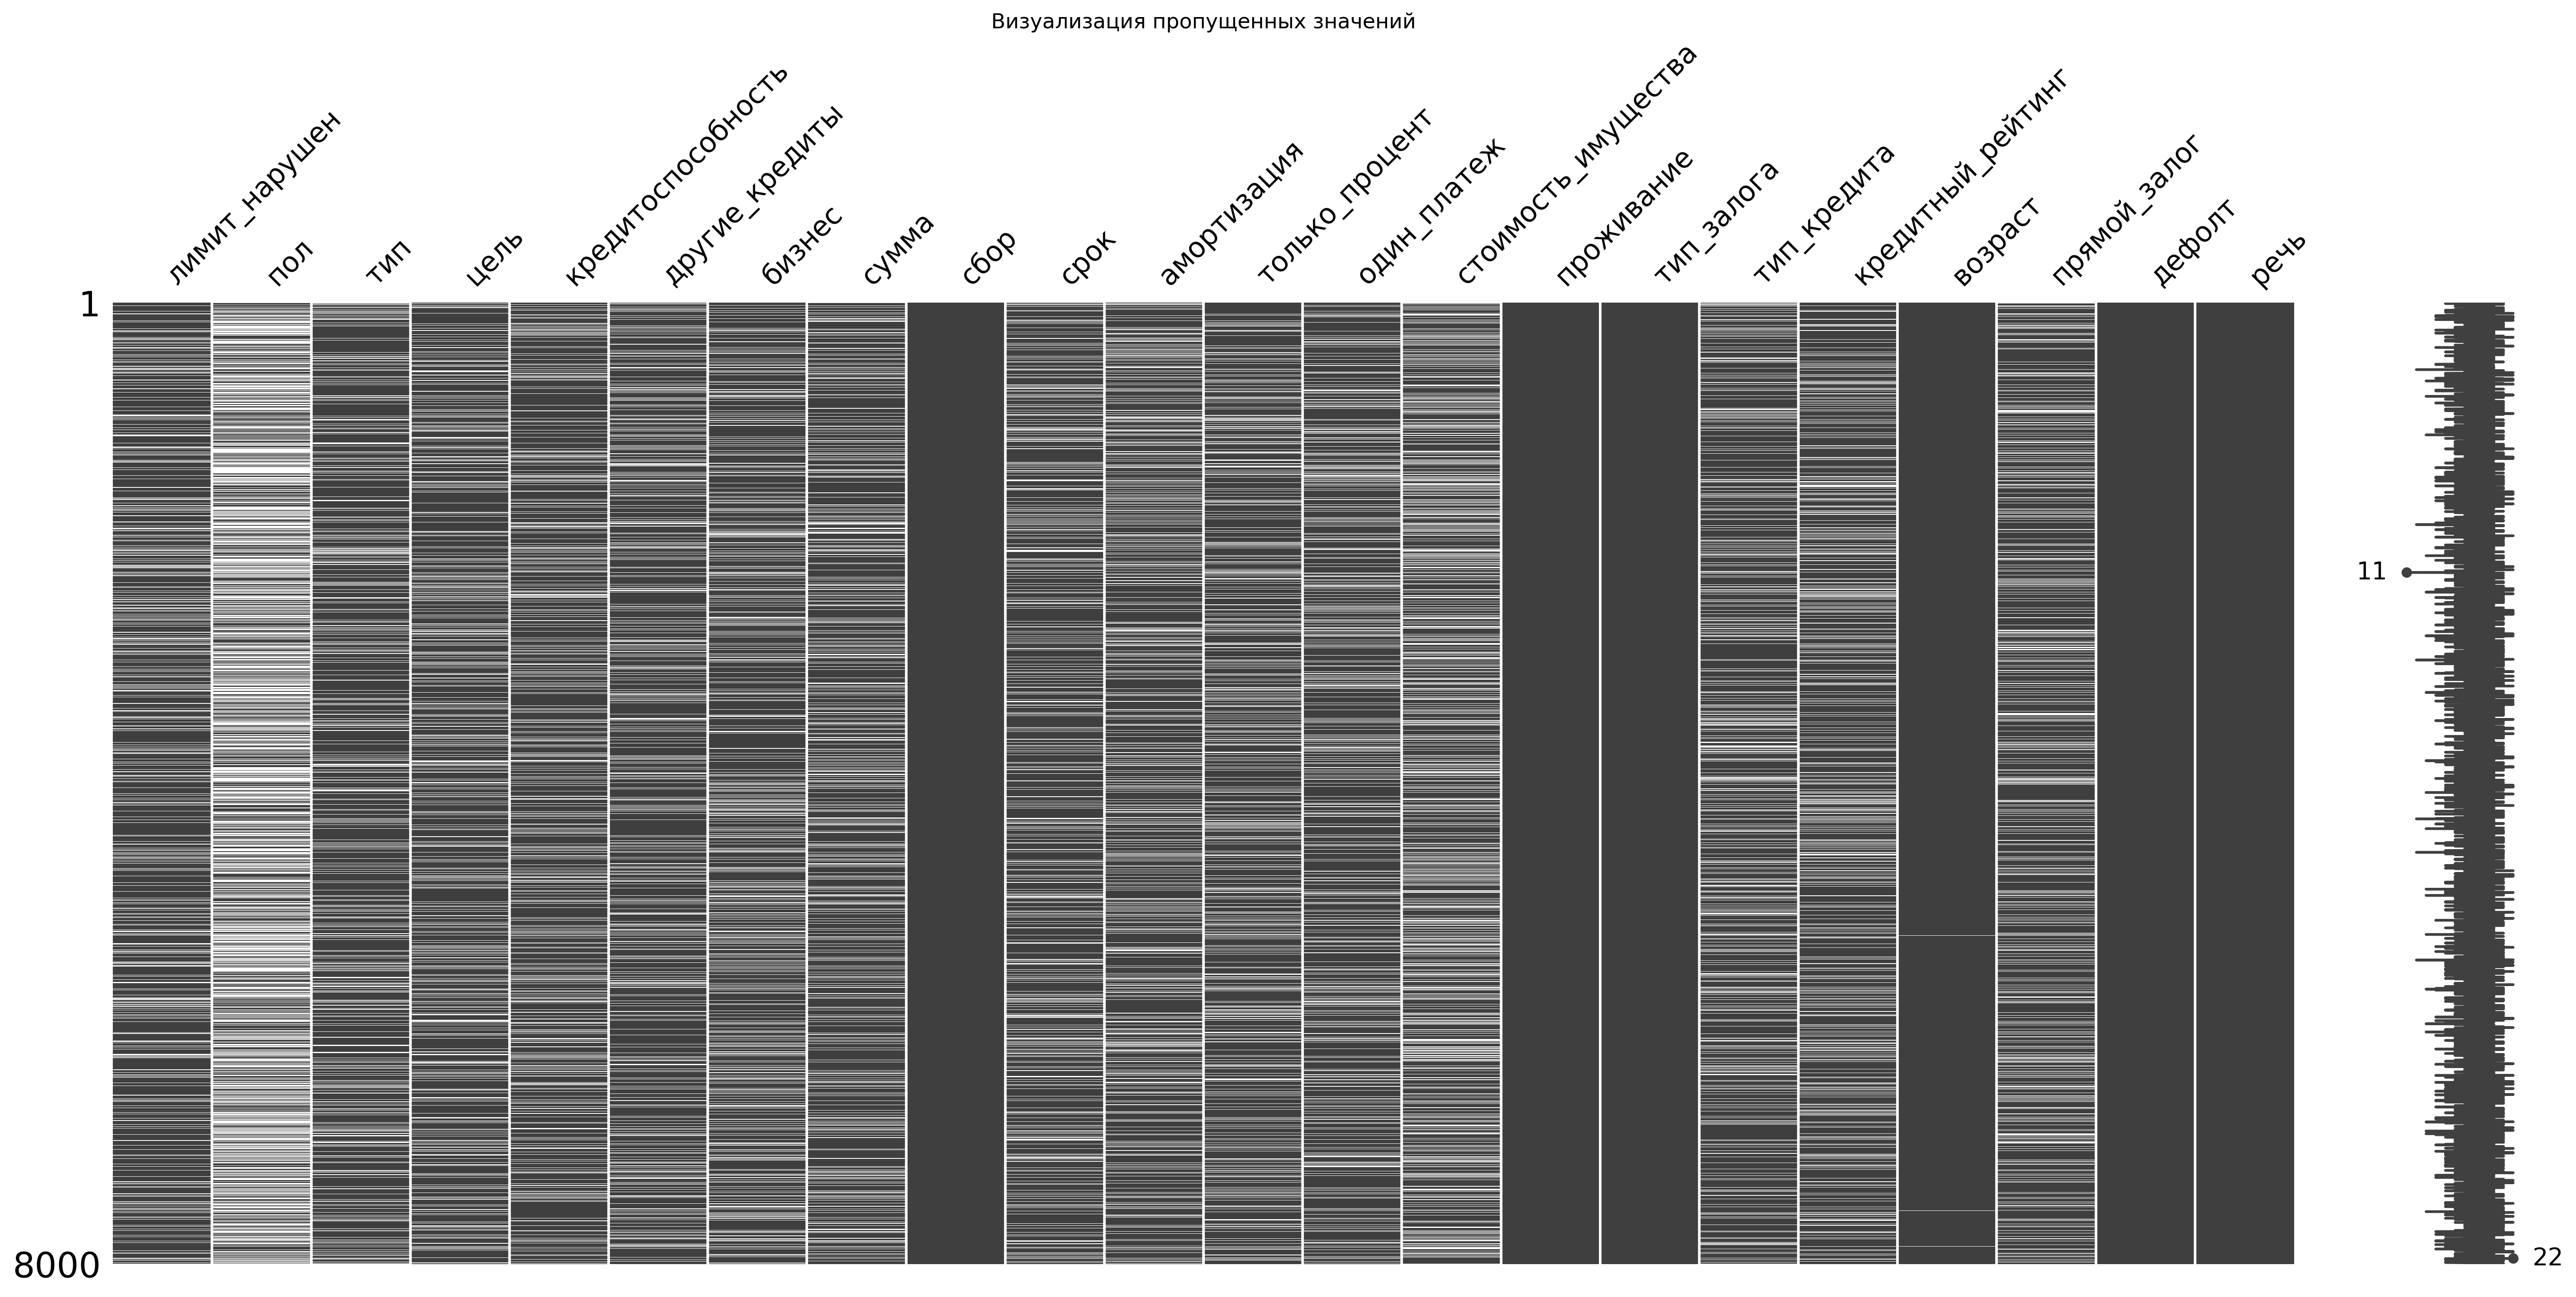

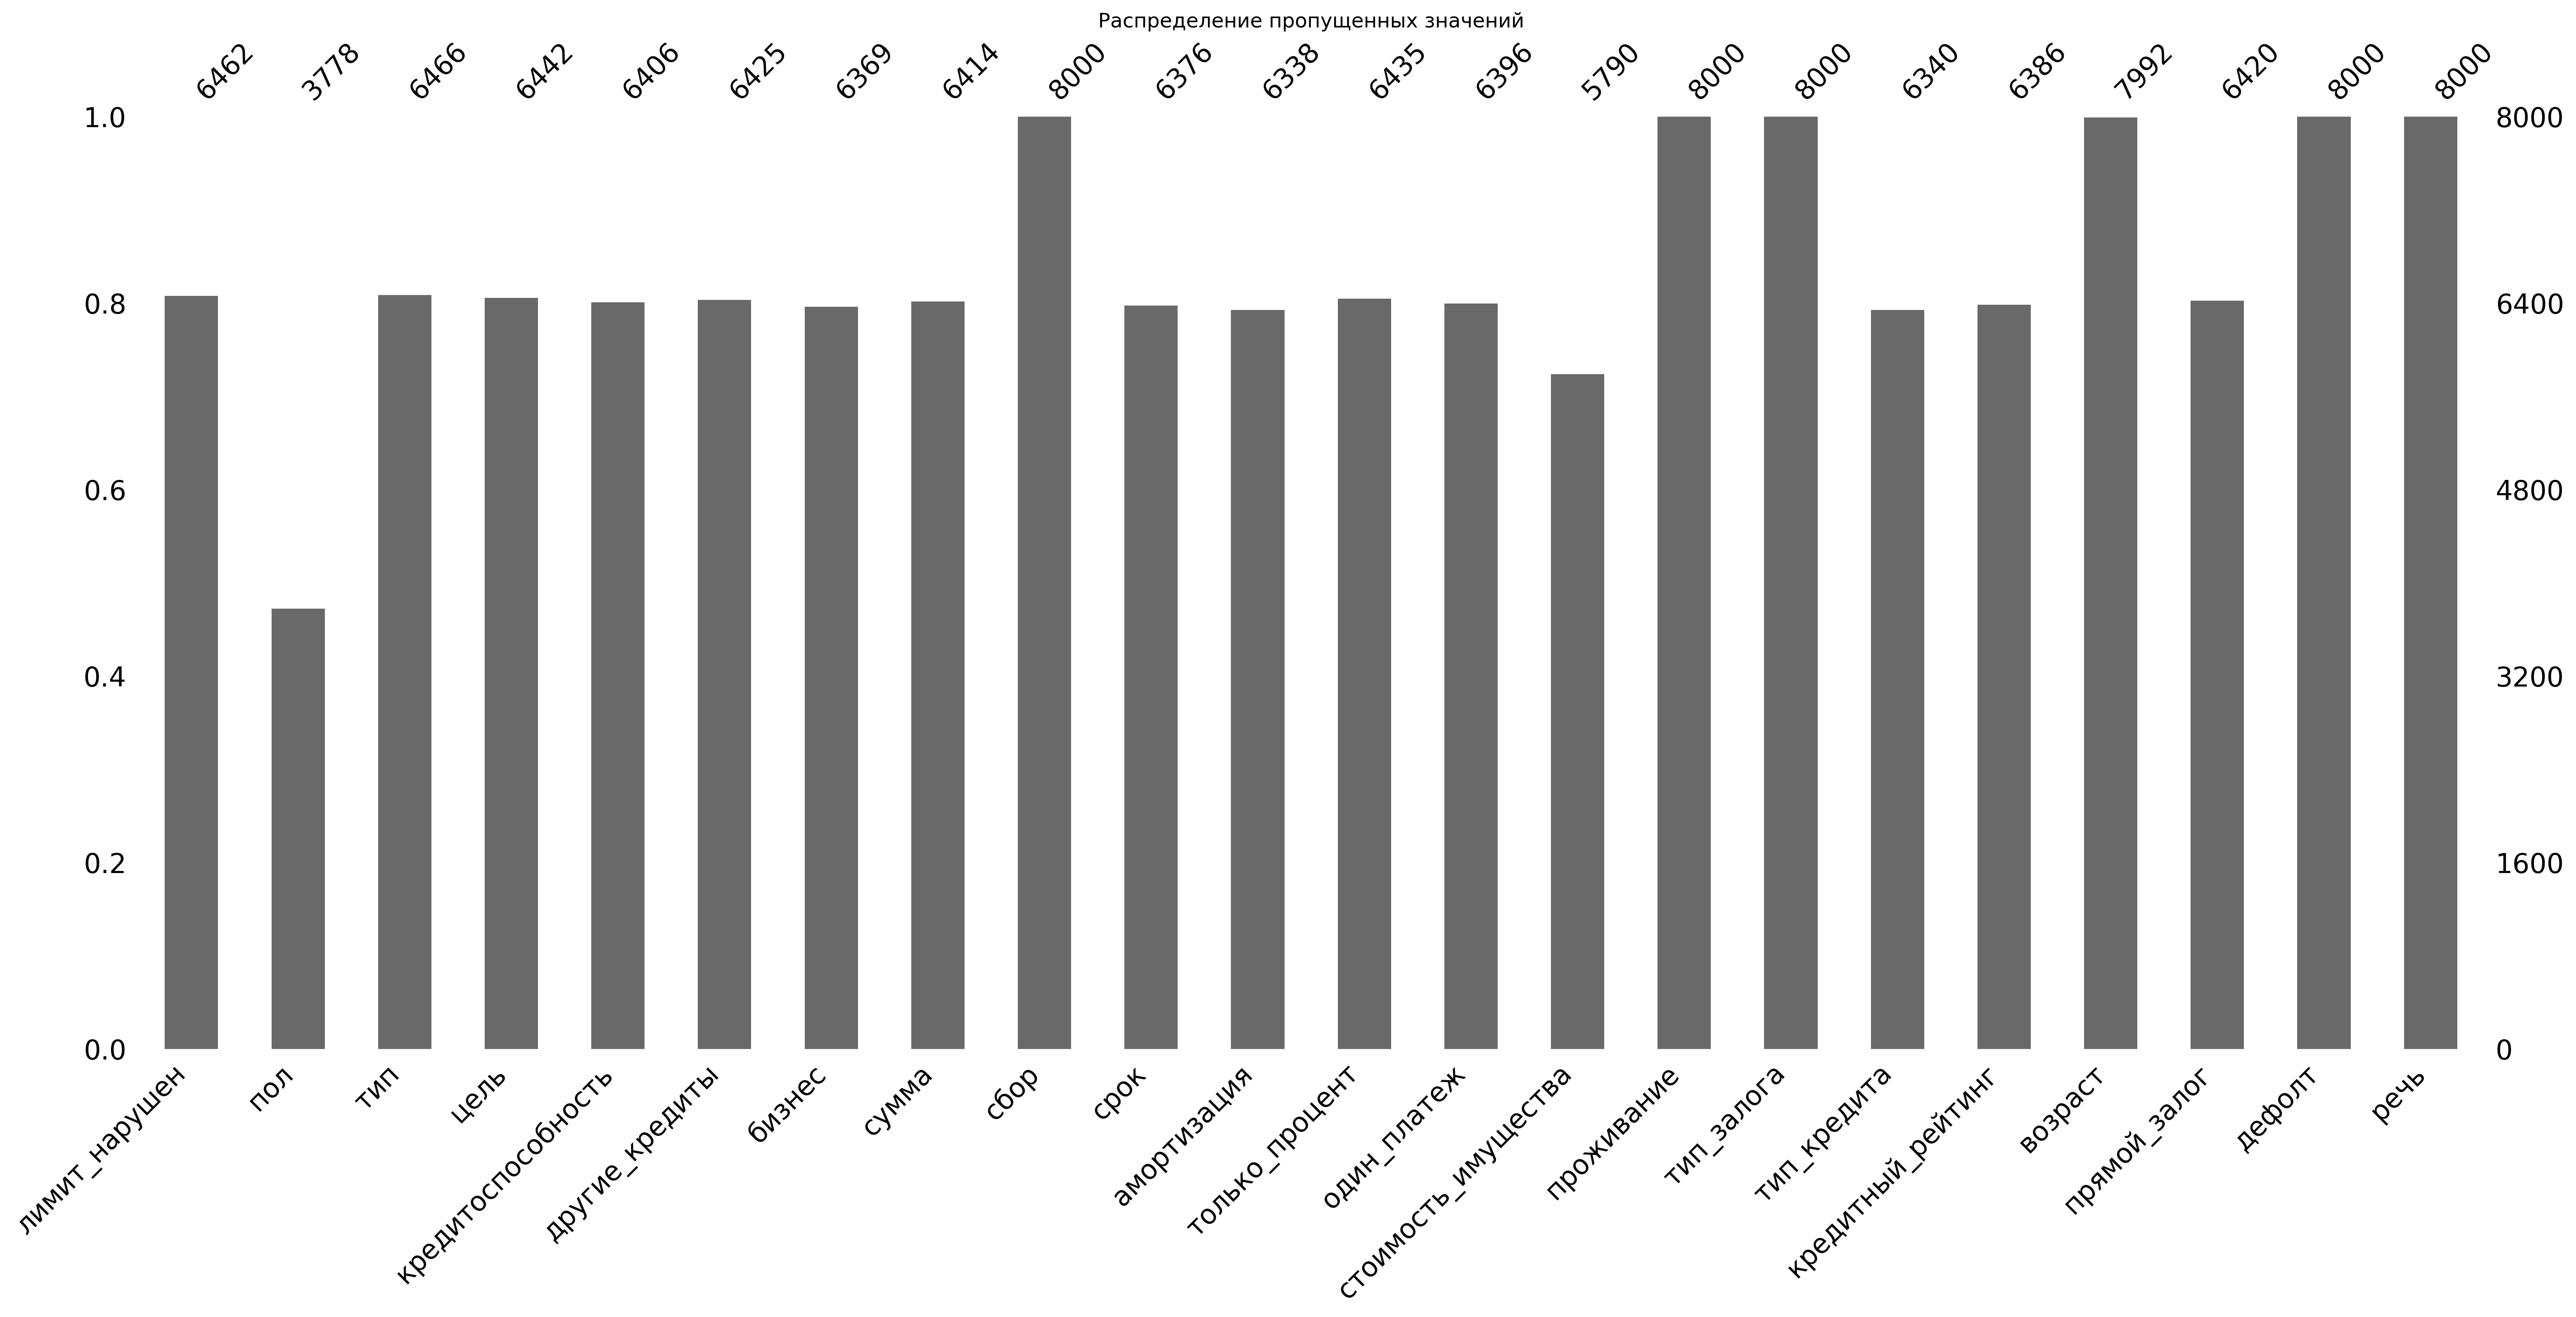

KeyError: "'greys' is not a known colormap name"

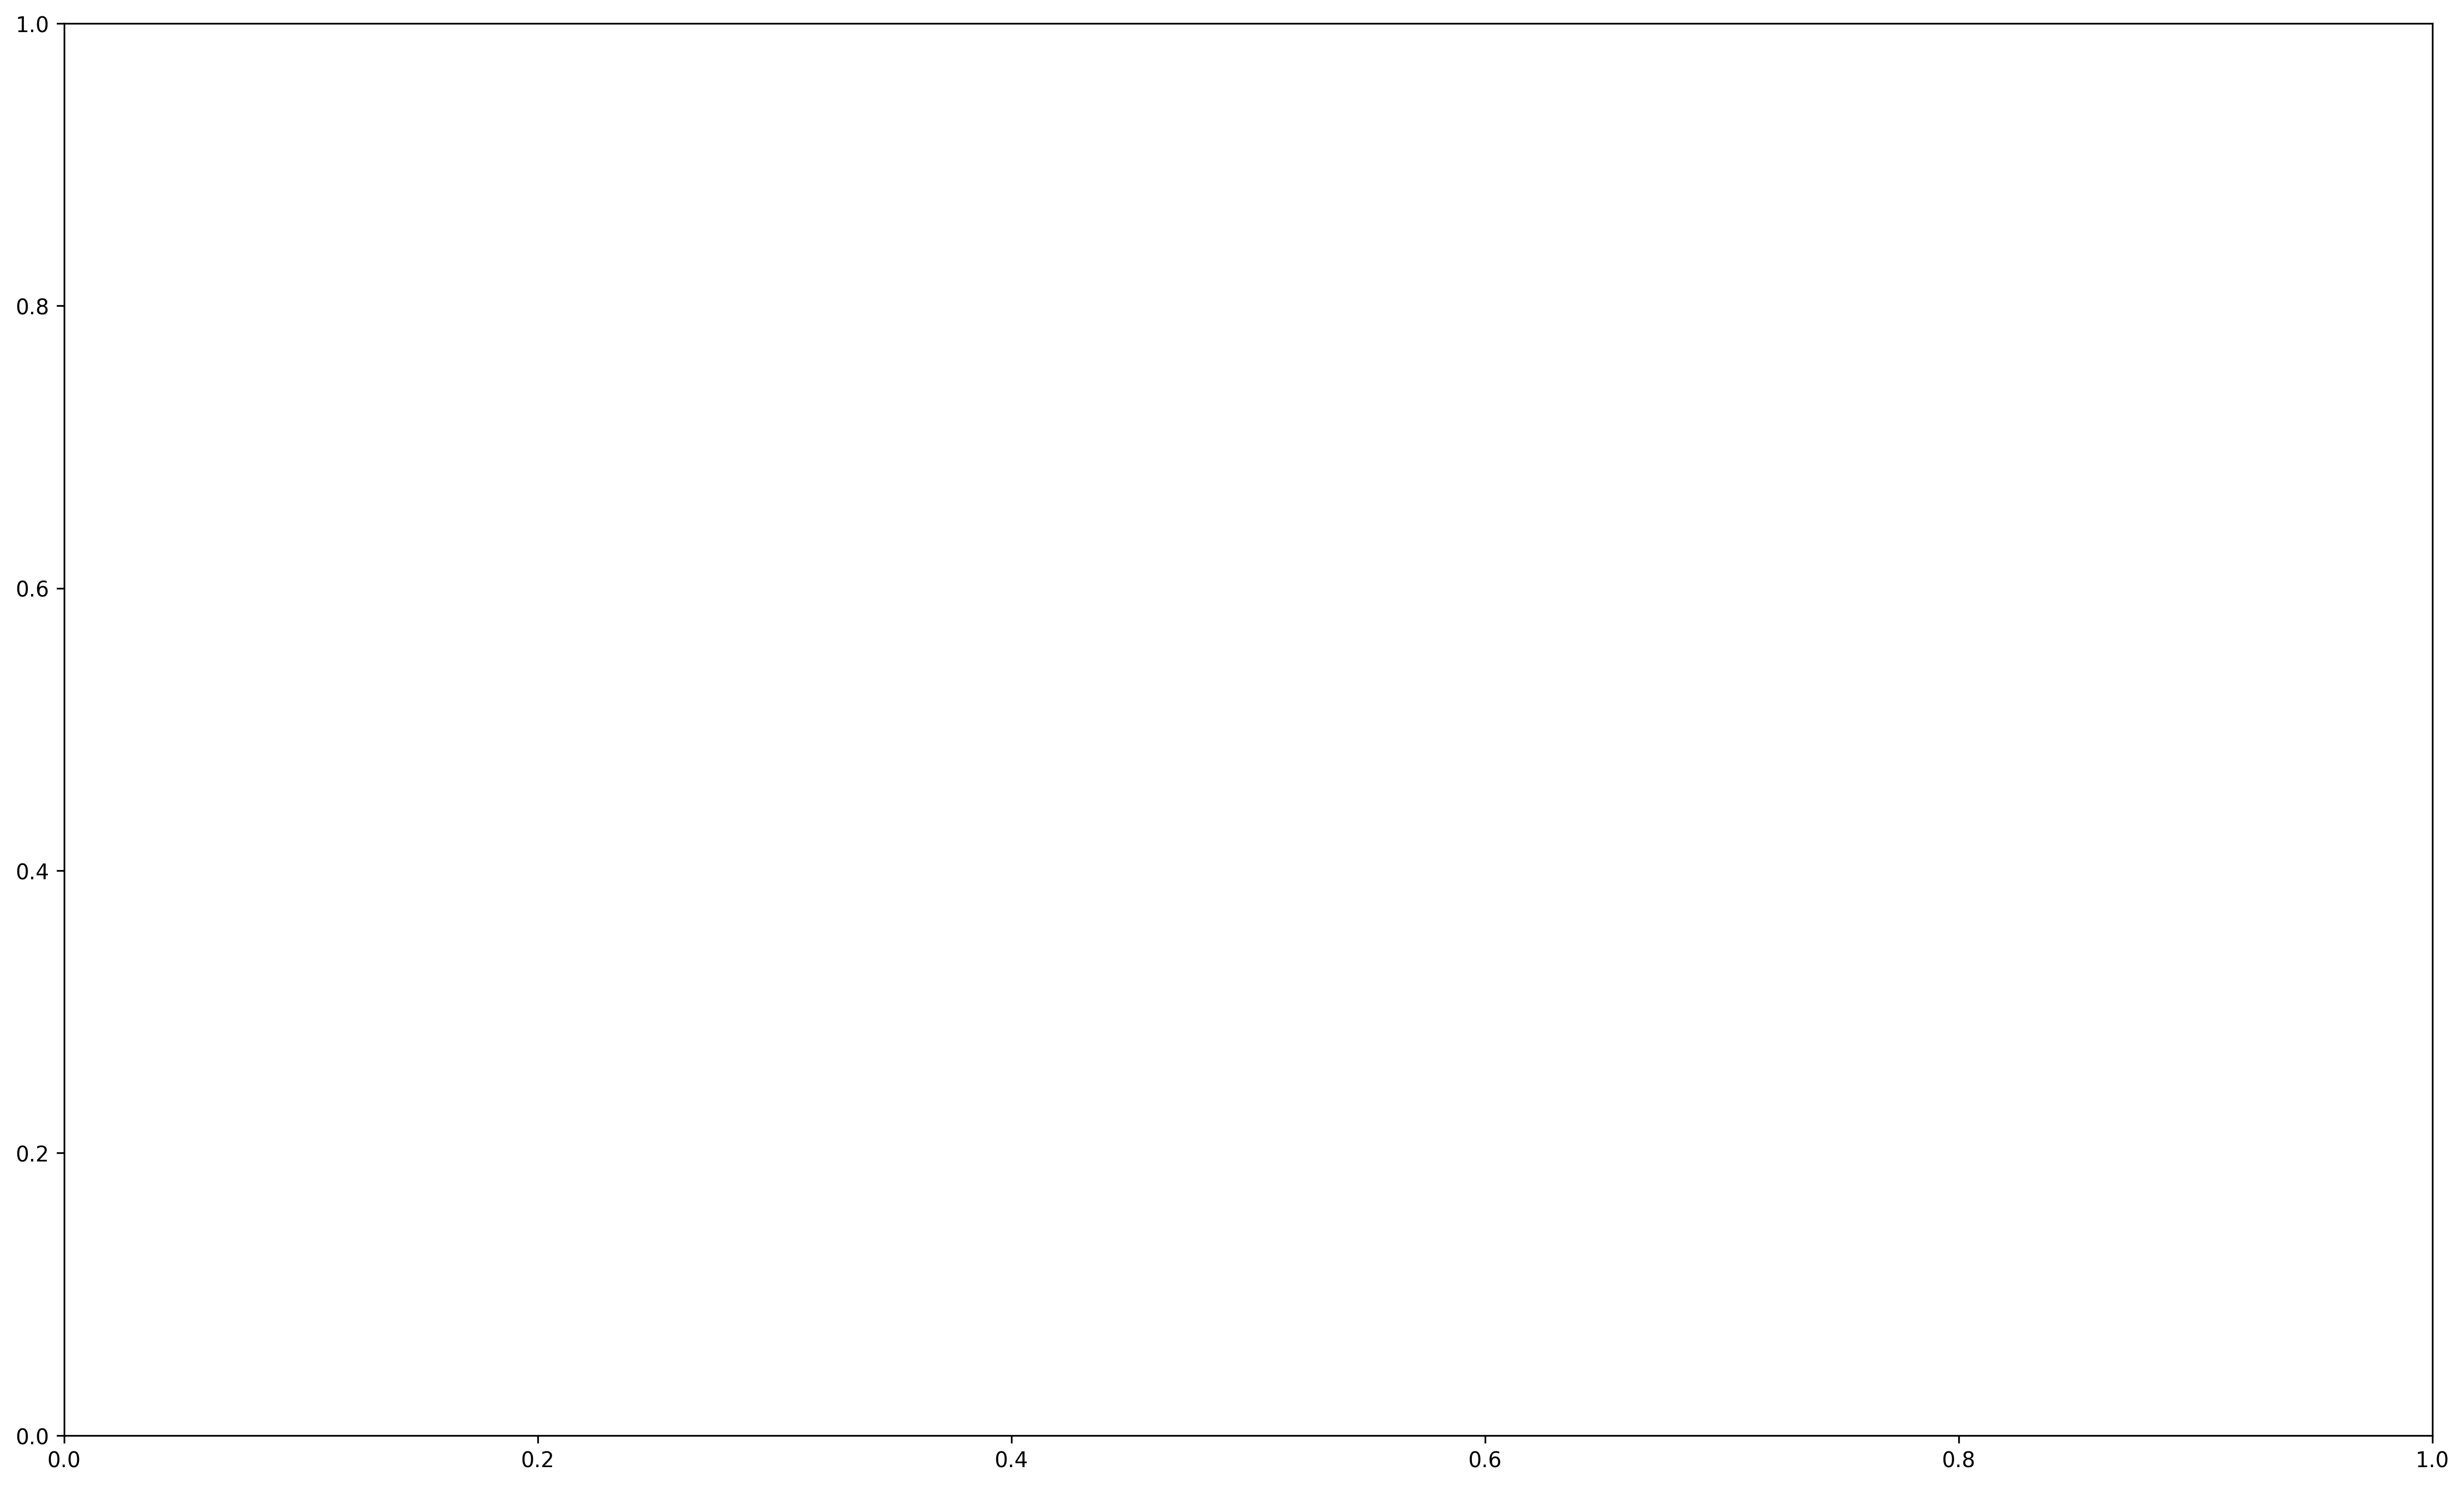

In [20]:
vis.plot_nan(loan_data)

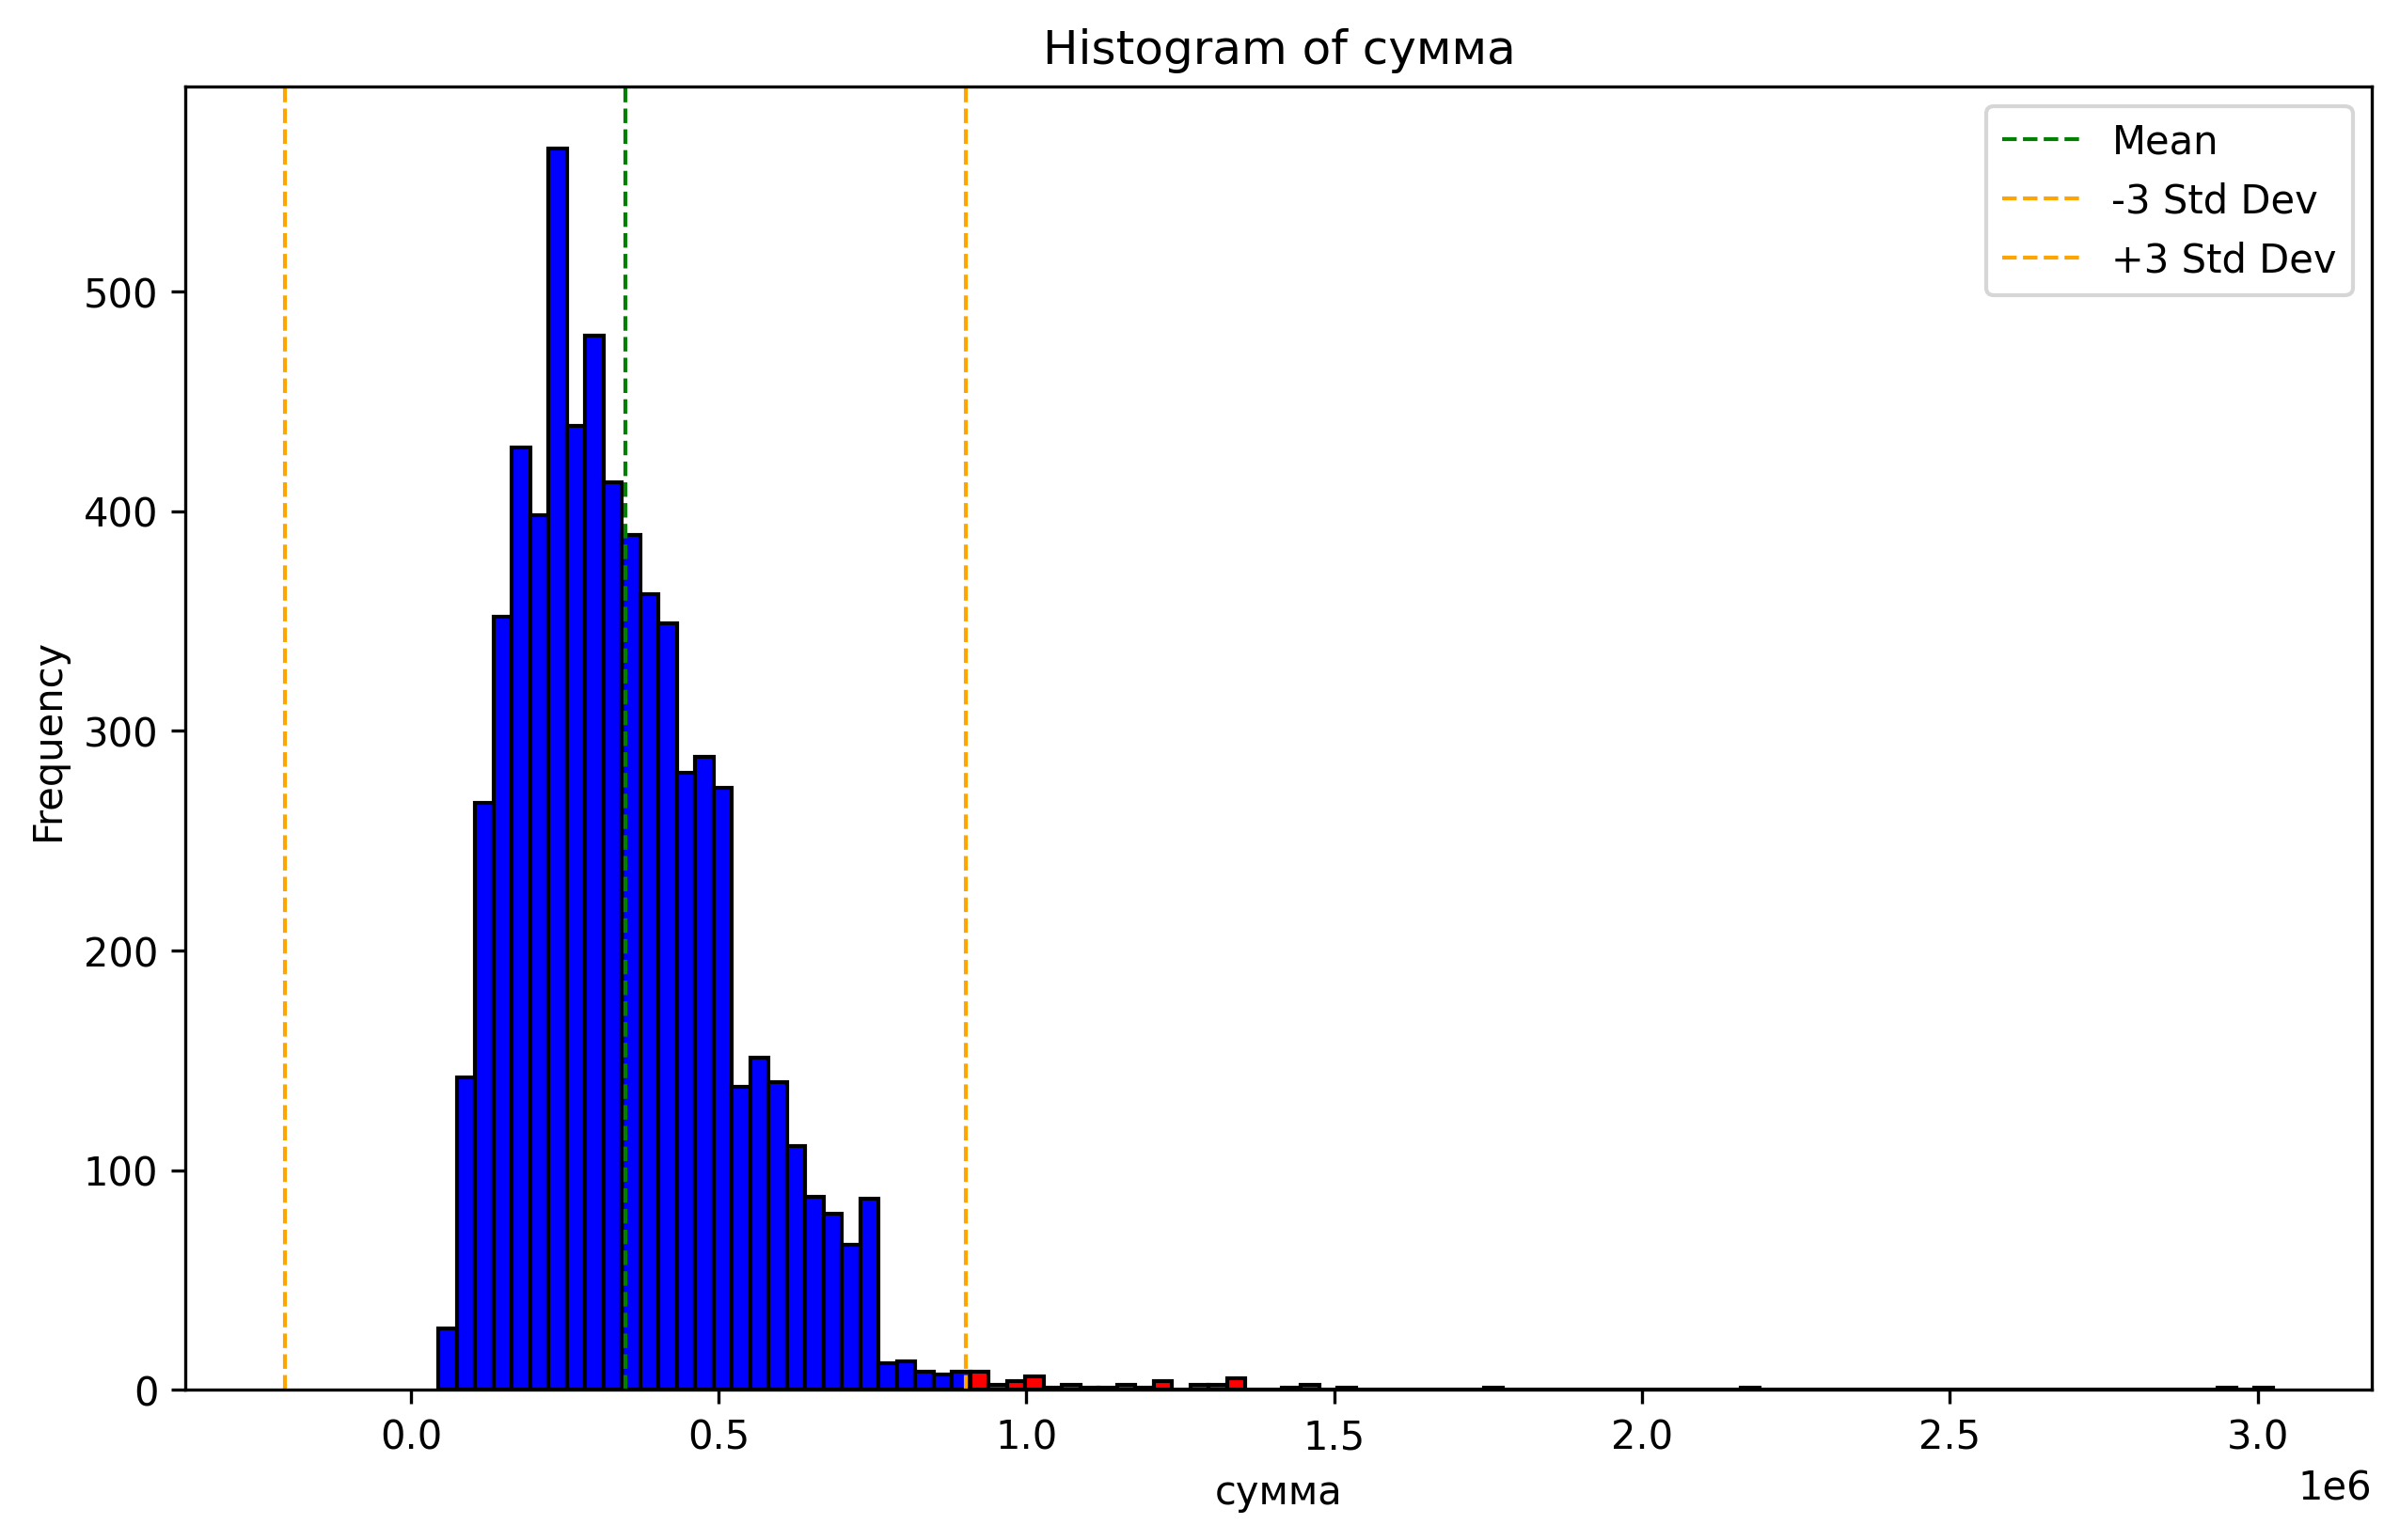

In [12]:
vis.plot_anomalies(loan_data, ["сумма"])

<Axes: >

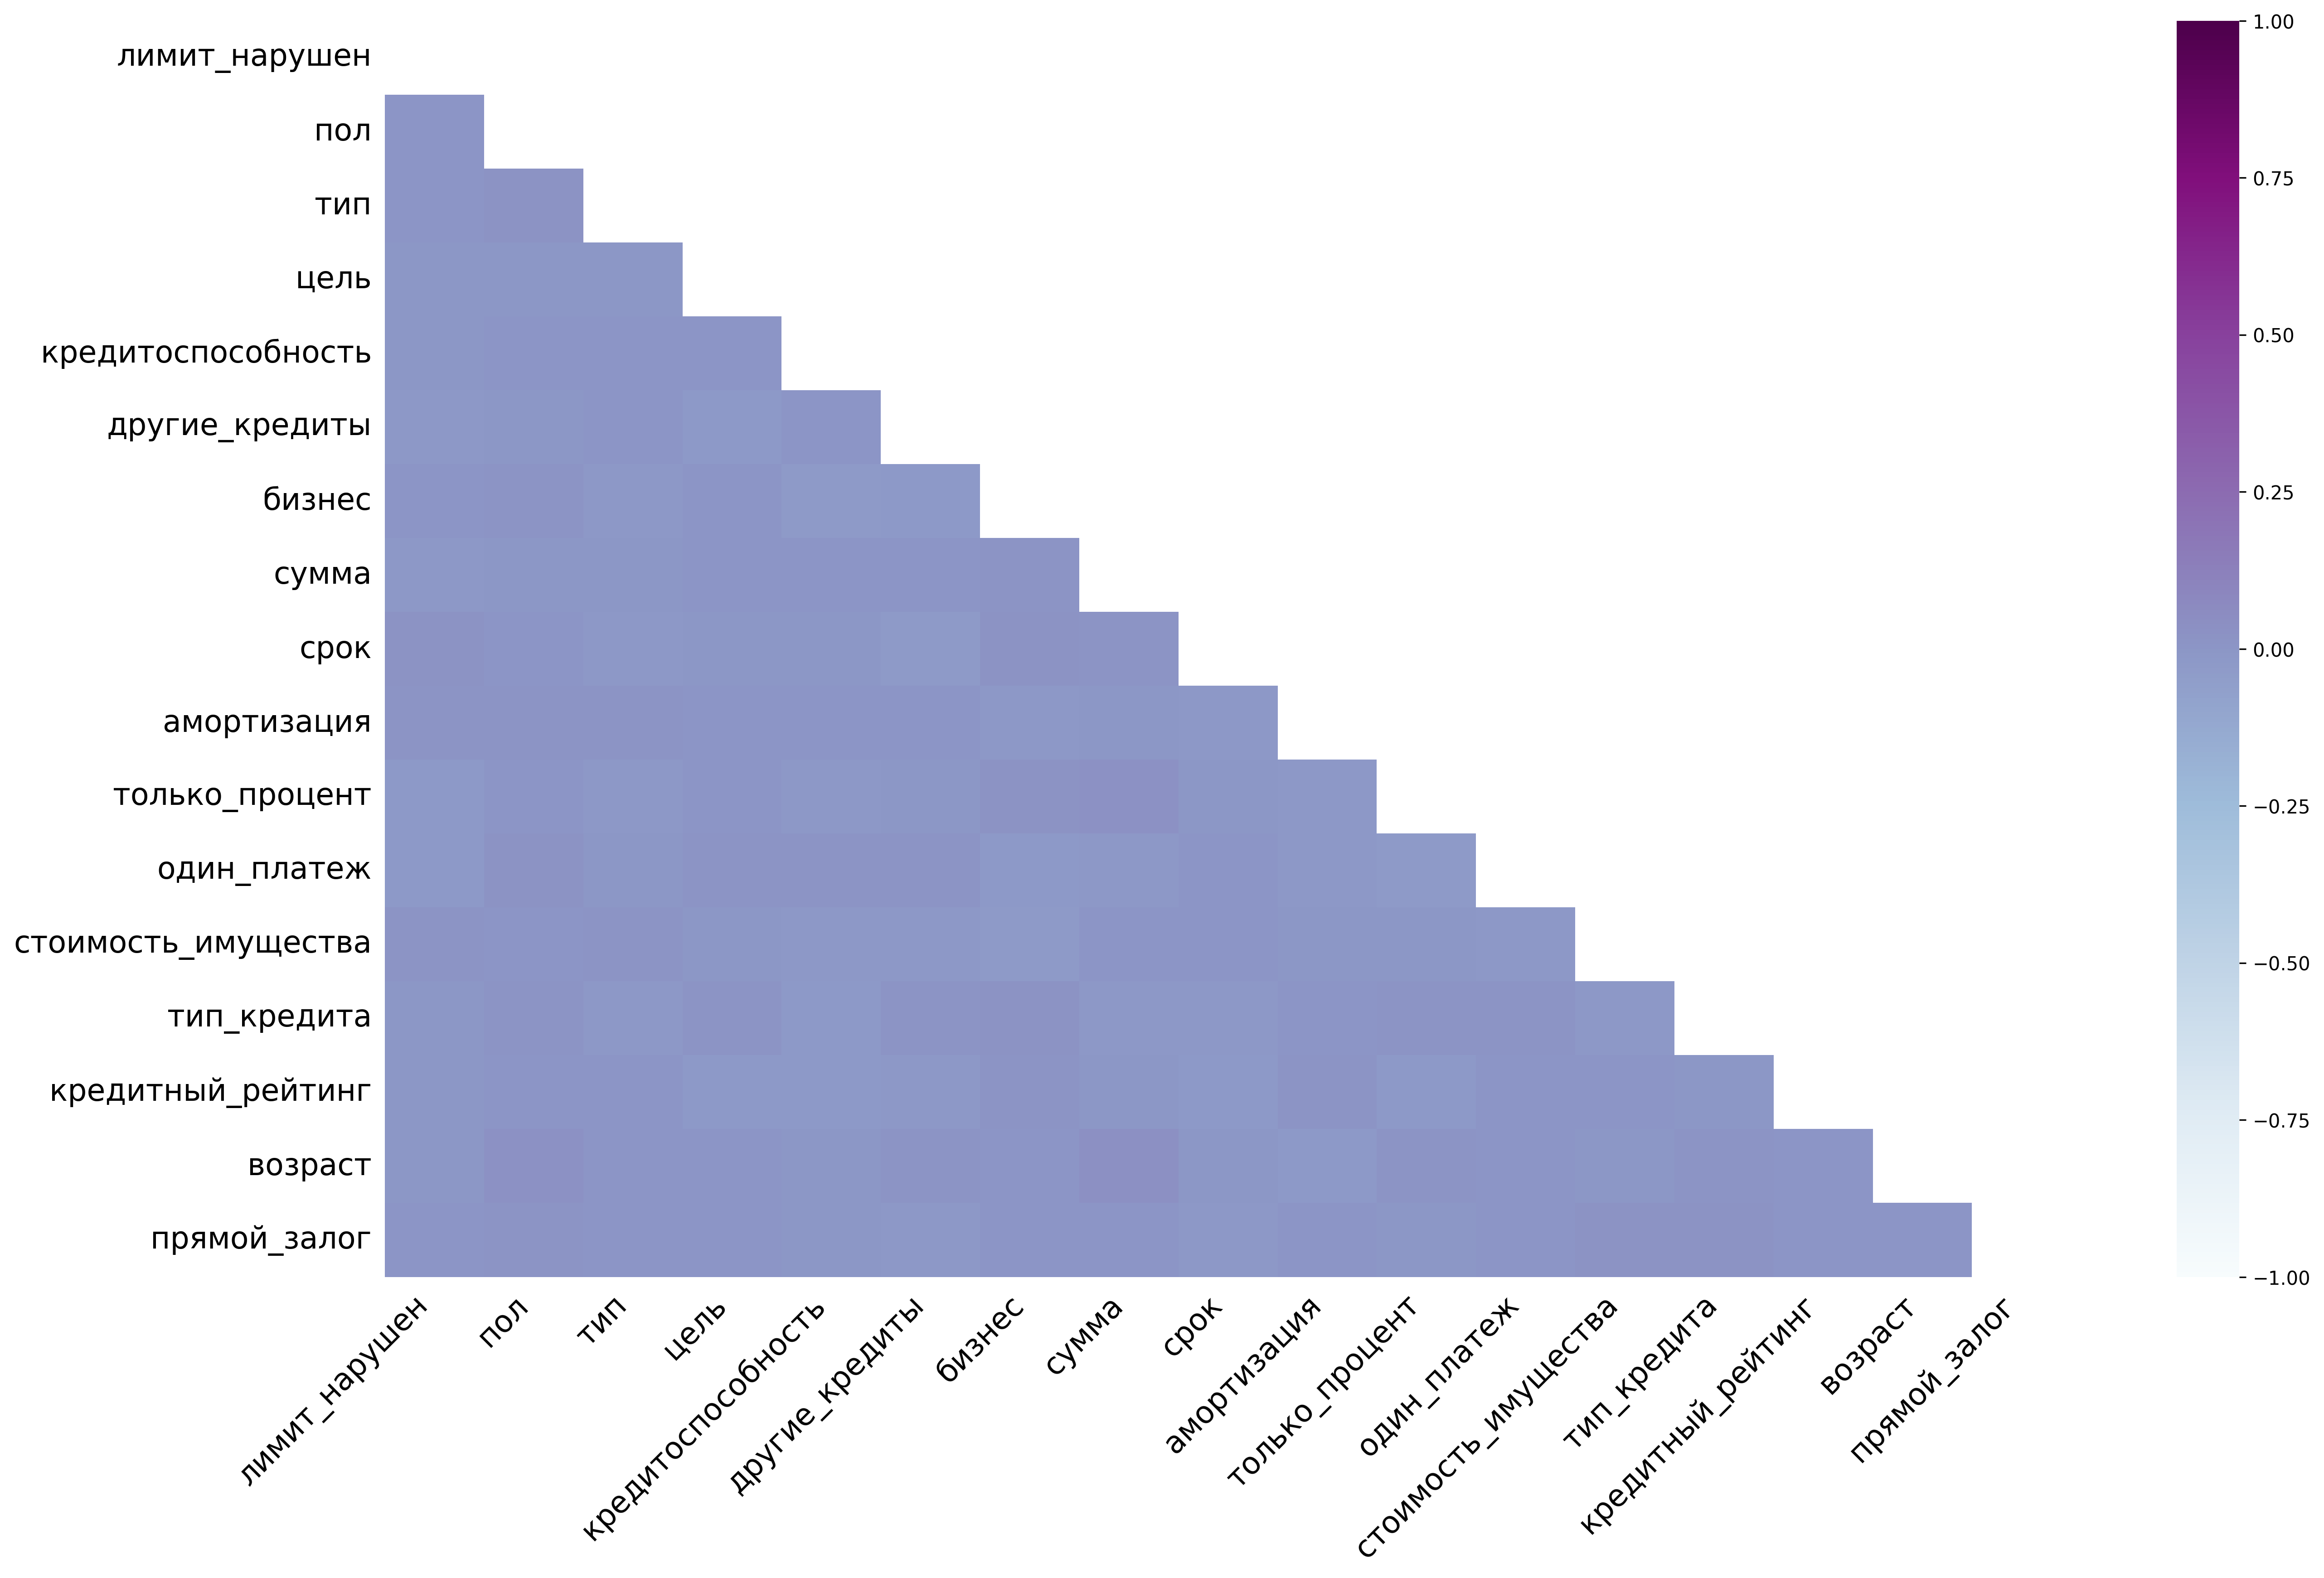

In [22]:
import missingno as msno
msno.heatmap(loan_data, cmap="BuPu")

In [13]:
loan_data[loan_data["сумма"] > 1.5*10**6]

лимит_нарушен  пол  тип  цель  кредитоспособность  другие_кредиты  \
779             1.0  NaN  3.0   NaN                 1.0             NaN   
836             1.0  NaN  3.0   1.0                 1.0             0.0   
1783            1.0  NaN  3.0   0.0                 NaN             0.0   
4817            1.0  NaN  3.0   3.0                 1.0             0.0   
6254            1.0  NaN  3.0   0.0                 1.0             0.0   

      бизнес         сумма        сбор        срок  ...  один_платеж  \
779      0.0  3.024765e+06  Not a sign         NaN  ...          0.0   
836      0.0  1.514765e+06         Nil  365.885949  ...          0.0   
1783     0.0  2.164765e+06      demand  185.885949  ...          NaN   
4817     NaN  1.744765e+06   requisite  365.885949  ...          0.0   
6254     0.0  2.944765e+06      dearth  365.885949  ...          0.0   

      стоимость_имущества  проживание  тип_залога тип_кредита  \
779                   NaN         осн         дом         NaN   
836          3.044488e+06         осн         дом         3.0   
1783                  NaN         осн         дом         2.0   
4817                  NaN         осн         дом         NaN   
6254         4.914488e+06         осн         дом         2.0   

     кредитный_рейтинг  возраст  прямой_залог дефолт  \
779         785.508335    25-34           NaN      1   
836         837.508335    55-64           1.0      0   
1783        623.508335    45-54           1.0      1   
4817               NaN    35-44           1.0      1   
6254        674.508335    45-54           1.0      1   

                                                   речь  
779   "Finances are tricky — sometimes numbers and l...  
836   "Hi there! I’m here to discuss my financial op...  
1783  "I'm a high-income individual, but things have...  
4817  "I'm here with my partner, but things have bee...  
6254  "Hey there! I’m a high-income individual, but ...  

[5 rows x 22 columns]

<Axes: xlabel='стоимость_имущества', ylabel='дефолт'>

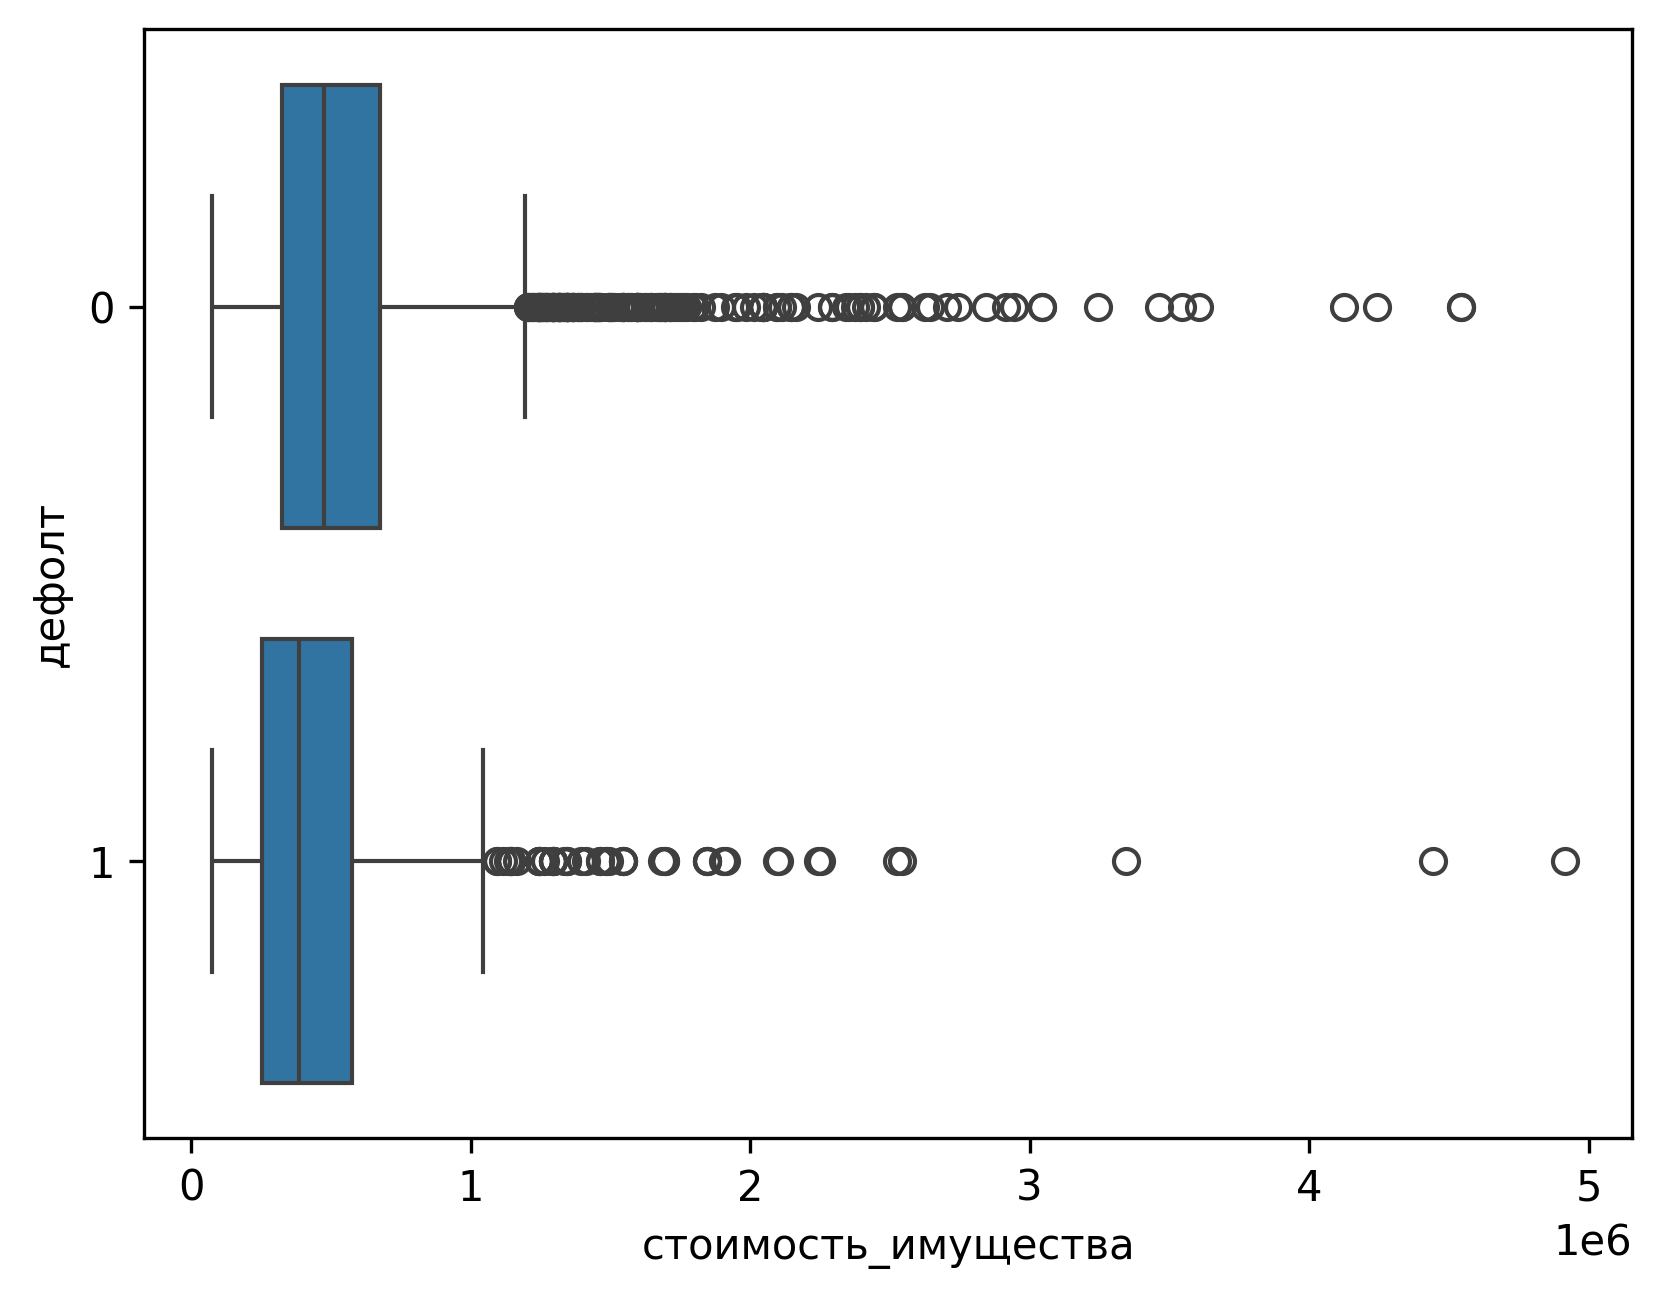

In [14]:
sns.boxplot(x=loan_data["стоимость_имущества"], y=loan_data[TARGET].astype("category"))

In [19]:
numerical_features_data = loan_data[numeric_features]
numerical_features_data

срок  стоимость_имущества  кредитный_рейтинг          сумма
0     245.885949        244488.111841         709.508335  174765.264968
1     365.885949                  NaN         722.508335            NaN
2     365.885949        364488.111841         785.508335            NaN
3     365.885949        894488.111841         594.508335  474765.264968
4     365.885949        504488.111841         589.508335  384765.264968
...          ...                  ...                ...            ...
7995  125.885949        744488.111841                NaN            NaN
7996  185.885949        184488.111841         796.508335            NaN
7997  365.885949                  NaN         584.508335  394765.264968
7998  365.885949                  NaN         873.508335  594765.264968
7999  365.885949                  NaN                NaN  684765.264968

[8000 rows x 4 columns]

In [25]:
loan_data[["только_процент", "один_платеж"]].corr()

только_процент  один_платеж
только_процент        1.000000    -0.032148
один_платеж          -0.032148     1.000000

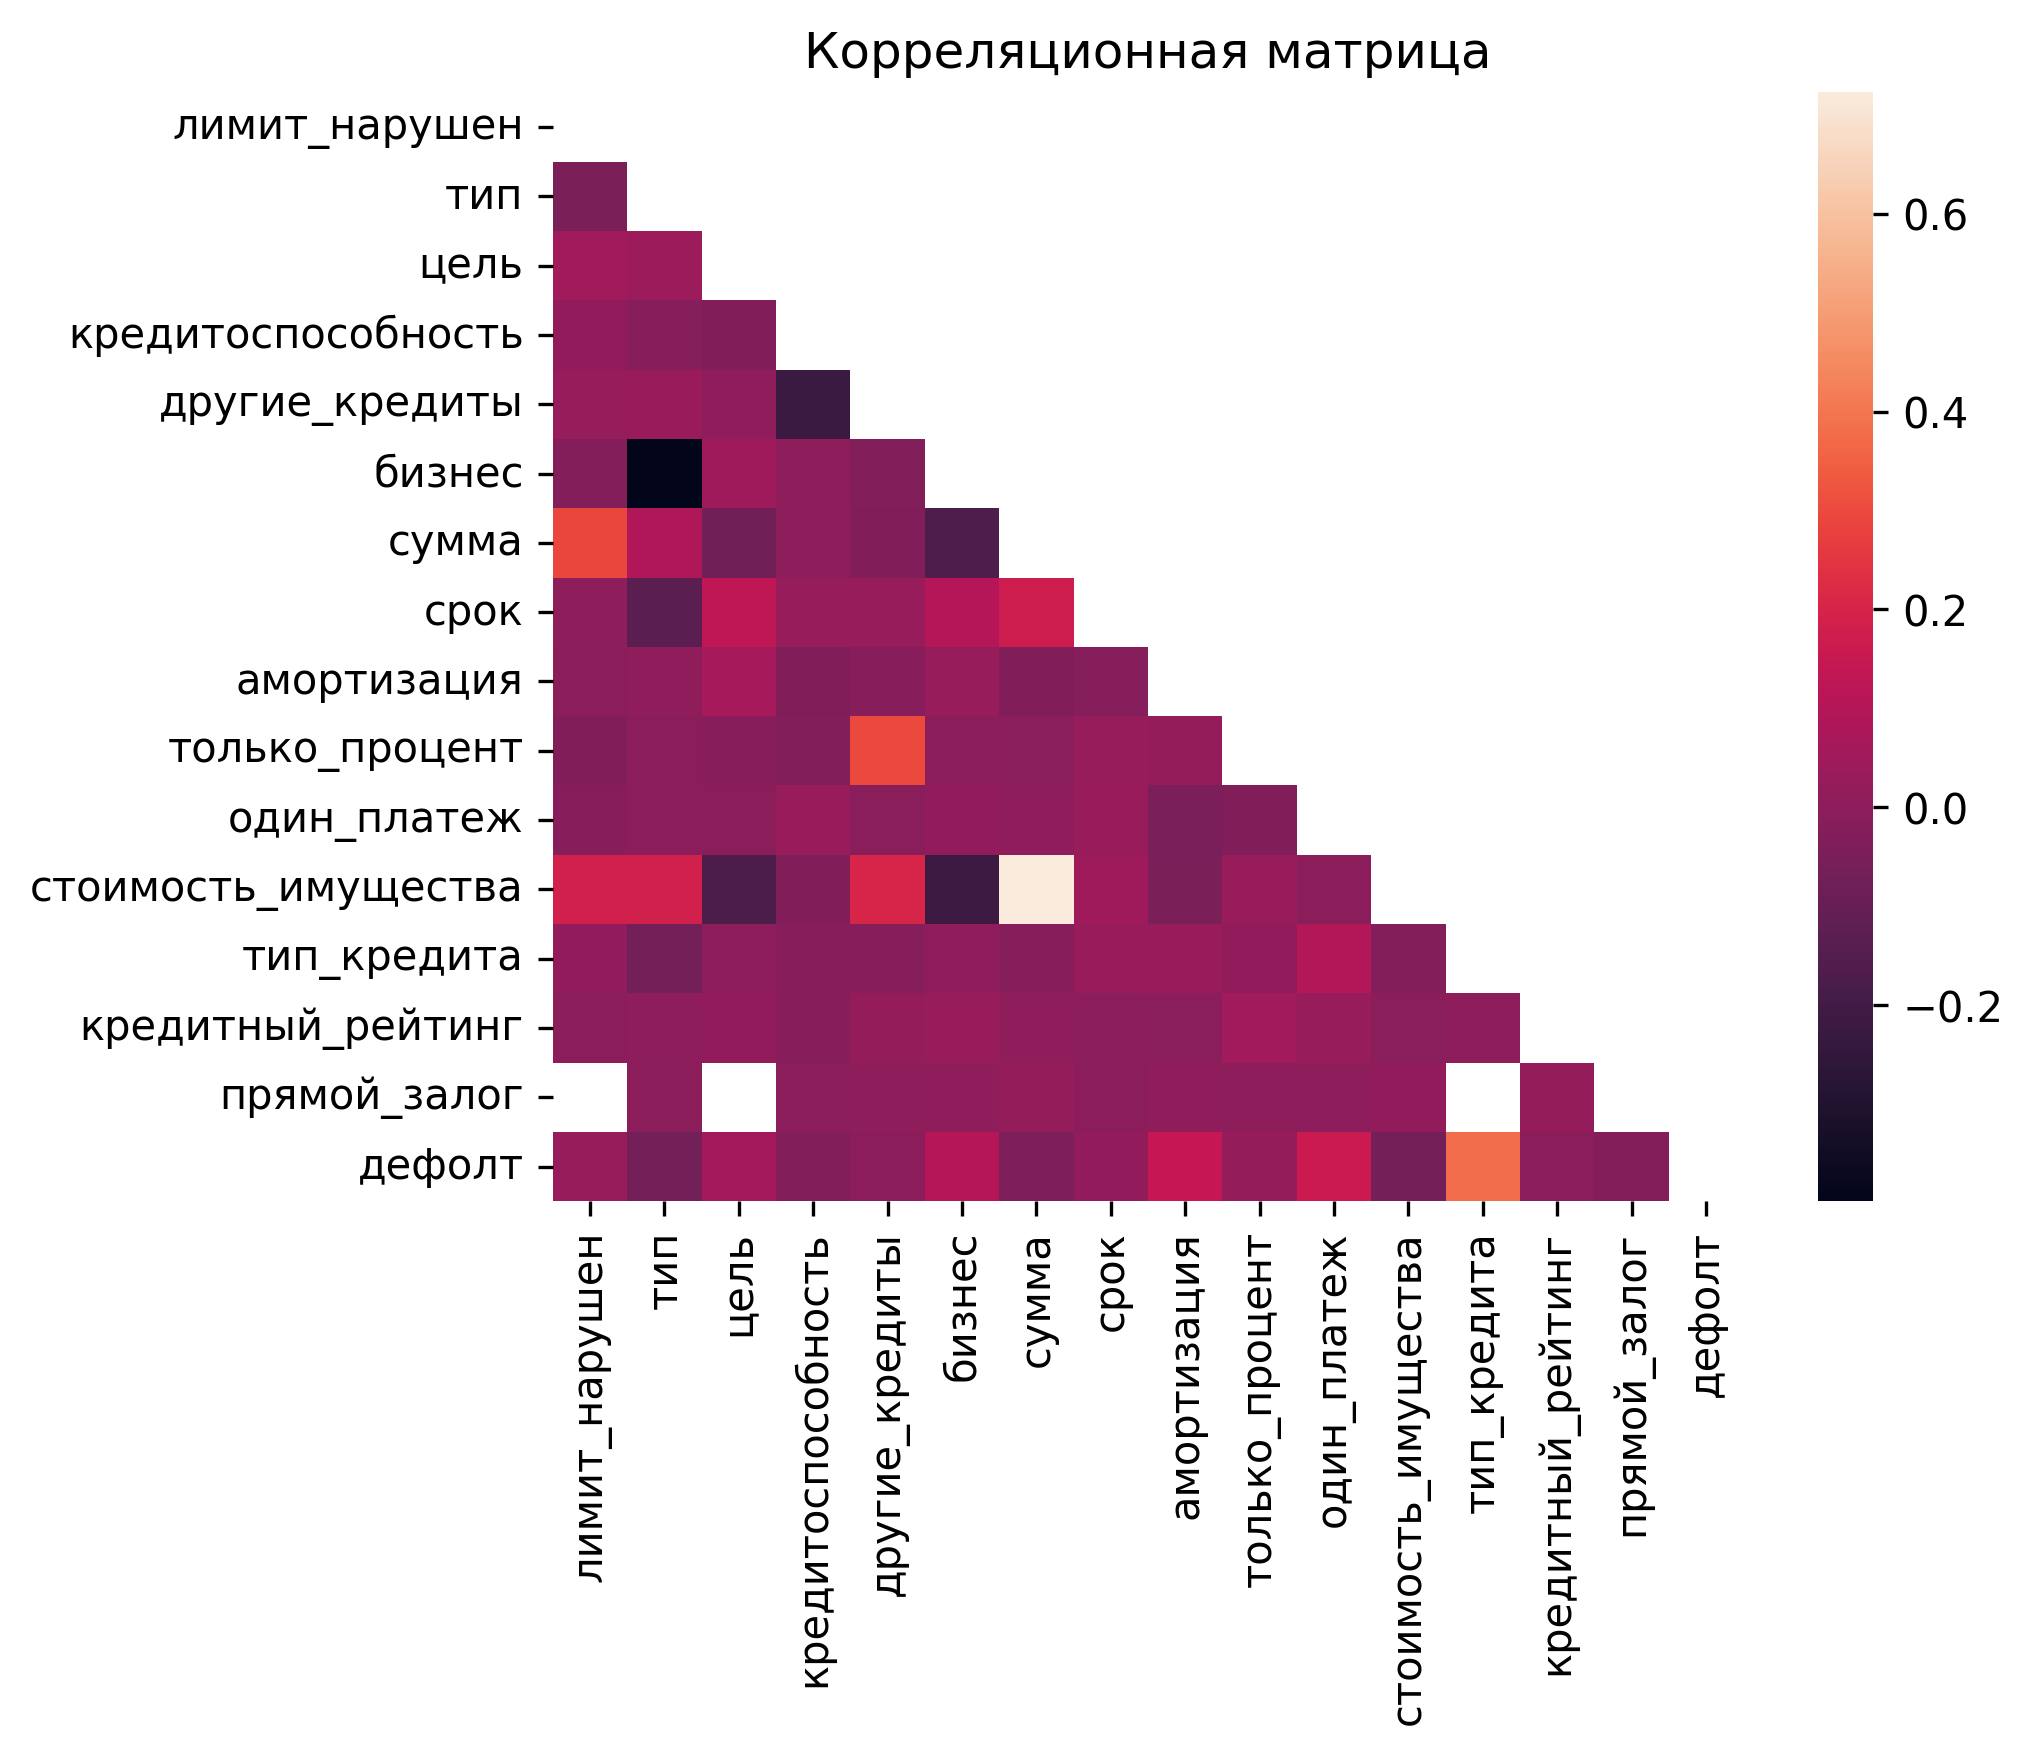

In [30]:
vis.plot_corr(
    loan_data, 
    loan_data.select_dtypes(exclude=object).columns,
)

In [35]:
def impute_col_by_important(df, important_features, col):
    df = df.copy()
    feats = important_features + [col]
    imputer = KNNImputer(n_neighbors=2)
    res = imputer.fit_transform(df[feats])
    df[col] = res[:, -1]
    return df


In [42]:
loan_data = pd.read_csv(DATA_PATH)

loan_data_imp = impute_col_by_important(
    loan_data, 
    ["лимит_нарушен", "тип", "другие_кредиты", "сумма"], 
    "стоимость_имущества"
)
loan_data_imp = impute_col_by_important(
    loan_data_imp, 
    ["цель", "бизнес", "сумма"], 
    "срок"
)
loan_data_imp = impute_col_by_important(
    loan_data_imp, 
    ["лимит_нарушен", "тип", ], 
    "сумма"
)
# fig, axs = plt.subplots(1, 2)
# loan_data["стоимость_имущества"].hist(bins=60, ax=axs[0])
# loan_data_imp["стоимость_имущества"].hist(bins=60, ax=axs[1])
# plt.suptitle("Распределение числовых признаков")
# plt.show()

In [44]:
loan_data_imp.isna().sum()

лимит_нарушен          1538
пол                    4222
тип                    1534
цель                   1558
кредитоспособность     1594
другие_кредиты         1575
бизнес                 1631
сумма                     0
сбор                      0
срок                      0
амортизация            1662
только_процент         1565
один_платеж            1604
стоимость_имущества       0
проживание                0
тип_залога                0
тип_кредита            1660
кредитный_рейтинг      1614
возраст                   8
прямой_залог           1580
дефолт                    0
речь                      0
dtype: int64

<Axes: xlabel='кредитный_рейтинг', ylabel='Count'>

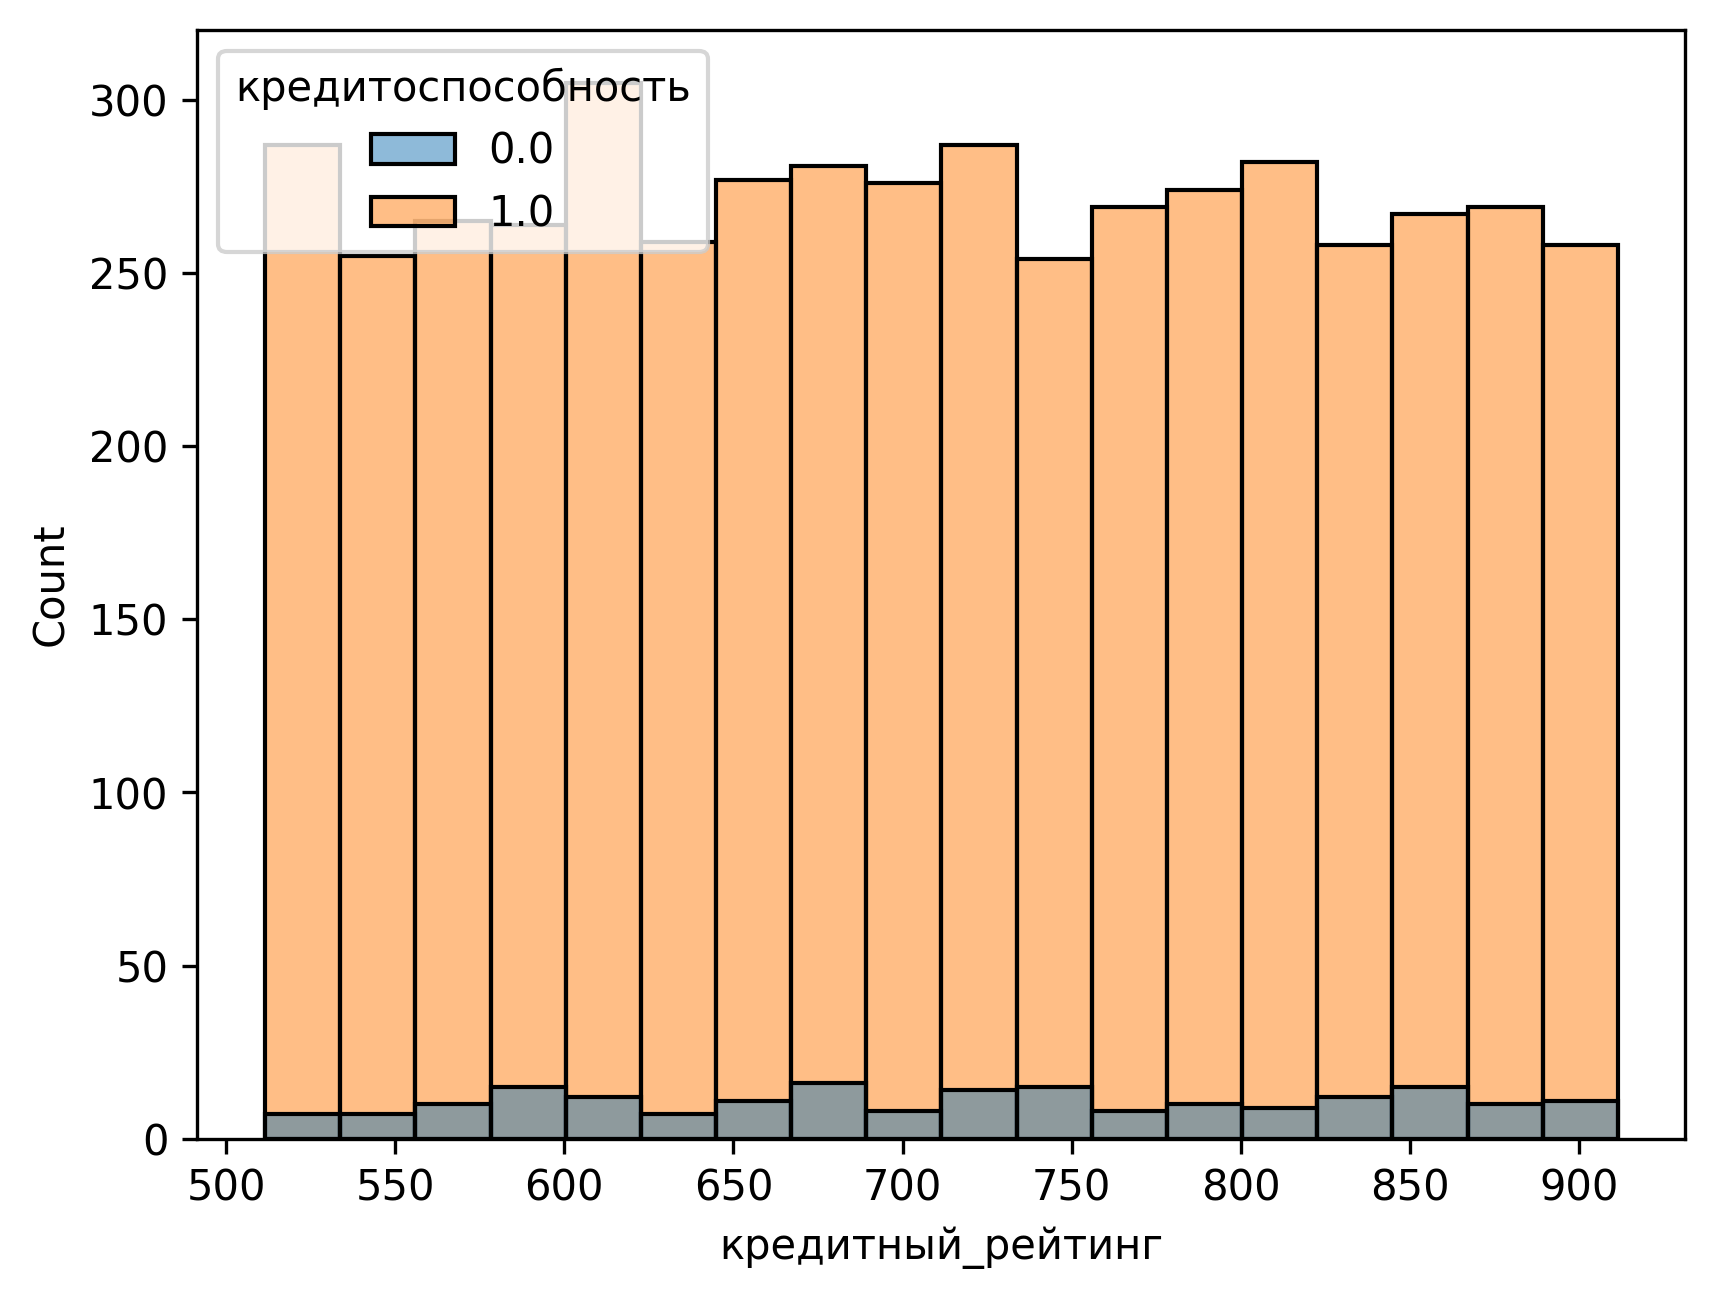

In [54]:
sns.histplot(x=loan_data_imp["кредитный_рейтинг"], hue=loan_data_imp["кредитоспособность"], stat="count")

In [55]:
categorical_features_data = loan_data[categorical_features]
categorical_features_data

лимит_нарушен  пол  тип  цель  кредитоспособность  другие_кредиты  \
0               0.0    м  3.0   0.0                 1.0             NaN   
1               0.0  NaN  NaN   0.0                 1.0             0.0   
2               0.0    м  3.0   1.0                 1.0             0.0   
3               0.0  NaN  3.0   1.0                 1.0             0.0   
4               0.0  NaN  3.0   1.0                 NaN             0.0   
...             ...  ...  ...   ...                 ...             ...   
7995            0.0  NaN  3.0   1.0                 NaN             0.0   
7996            NaN  NaN  NaN   1.0                 1.0             0.0   
7997            0.0    м  3.0   3.0                 1.0             NaN   
7998            NaN  NaN  NaN   1.0                 1.0             0.0   
7999            0.0    ж  1.0   0.0                 1.0             0.0   

      бизнес                    сбор  амортизация  только_процент  \
0        0.0                  normal          0.0             0.0   
1        0.0                    want          0.0             0.0   
2        0.0                 regular          0.0             0.0   
3        0.0                  common          0.0             0.0   
4        0.0               excessive          0.0             0.0   
...      ...                     ...          ...             ...   
7995     0.0              not slight          0.0             0.0   
7996     1.0                    mean          0.0             1.0   
7997     0.0     Whole lotta nothin'          0.0             0.0   
7998     0.0  Total lack of presence          0.0             0.0   
7999     0.0               minuscule          0.0             0.0   

      один_платеж проживание тип_залога  тип_кредита возраст  прямой_залог  
0             0.0        осн        дом          2.0   55-64           1.0  
1             0.0        осн        дом          1.0   55-64           NaN  
2             NaN        осн        дом          1.0   55-64           1.0  
3             0.0        осн        дом          NaN   35-44           1.0  
4             0.0        осн        дом          NaN   55-64           NaN  
...           ...        ...        ...          ...     ...           ...  
7995          0.0        осн        дом          2.0   35-44           NaN  
7996          0.0        осн        дом          1.0     >74           1.0  
7997          0.0        осн        дом          4.0   25-34           1.0  
7998          0.0        осн        дом          NaN   35-44           1.0  
7999          0.0        осн        дом          2.0   35-44           1.0  

[8000 rows x 16 columns]

In [ ]:
categorical_features_data

In [66]:
to_encode = ["пол", "тип_залога", "возраст", "проживание"]
encoder = OrdinalEncoder().fit(categorical_features_data[to_encode])
encoder.transform(categorical_features_data[to_encode])
loan_data_imp_enc = loan_data_imp.copy()
loan_data_imp_enc[to_encode] = encoder.transform(categorical_features_data[to_encode])

In [ ]:
выбросить дом земля

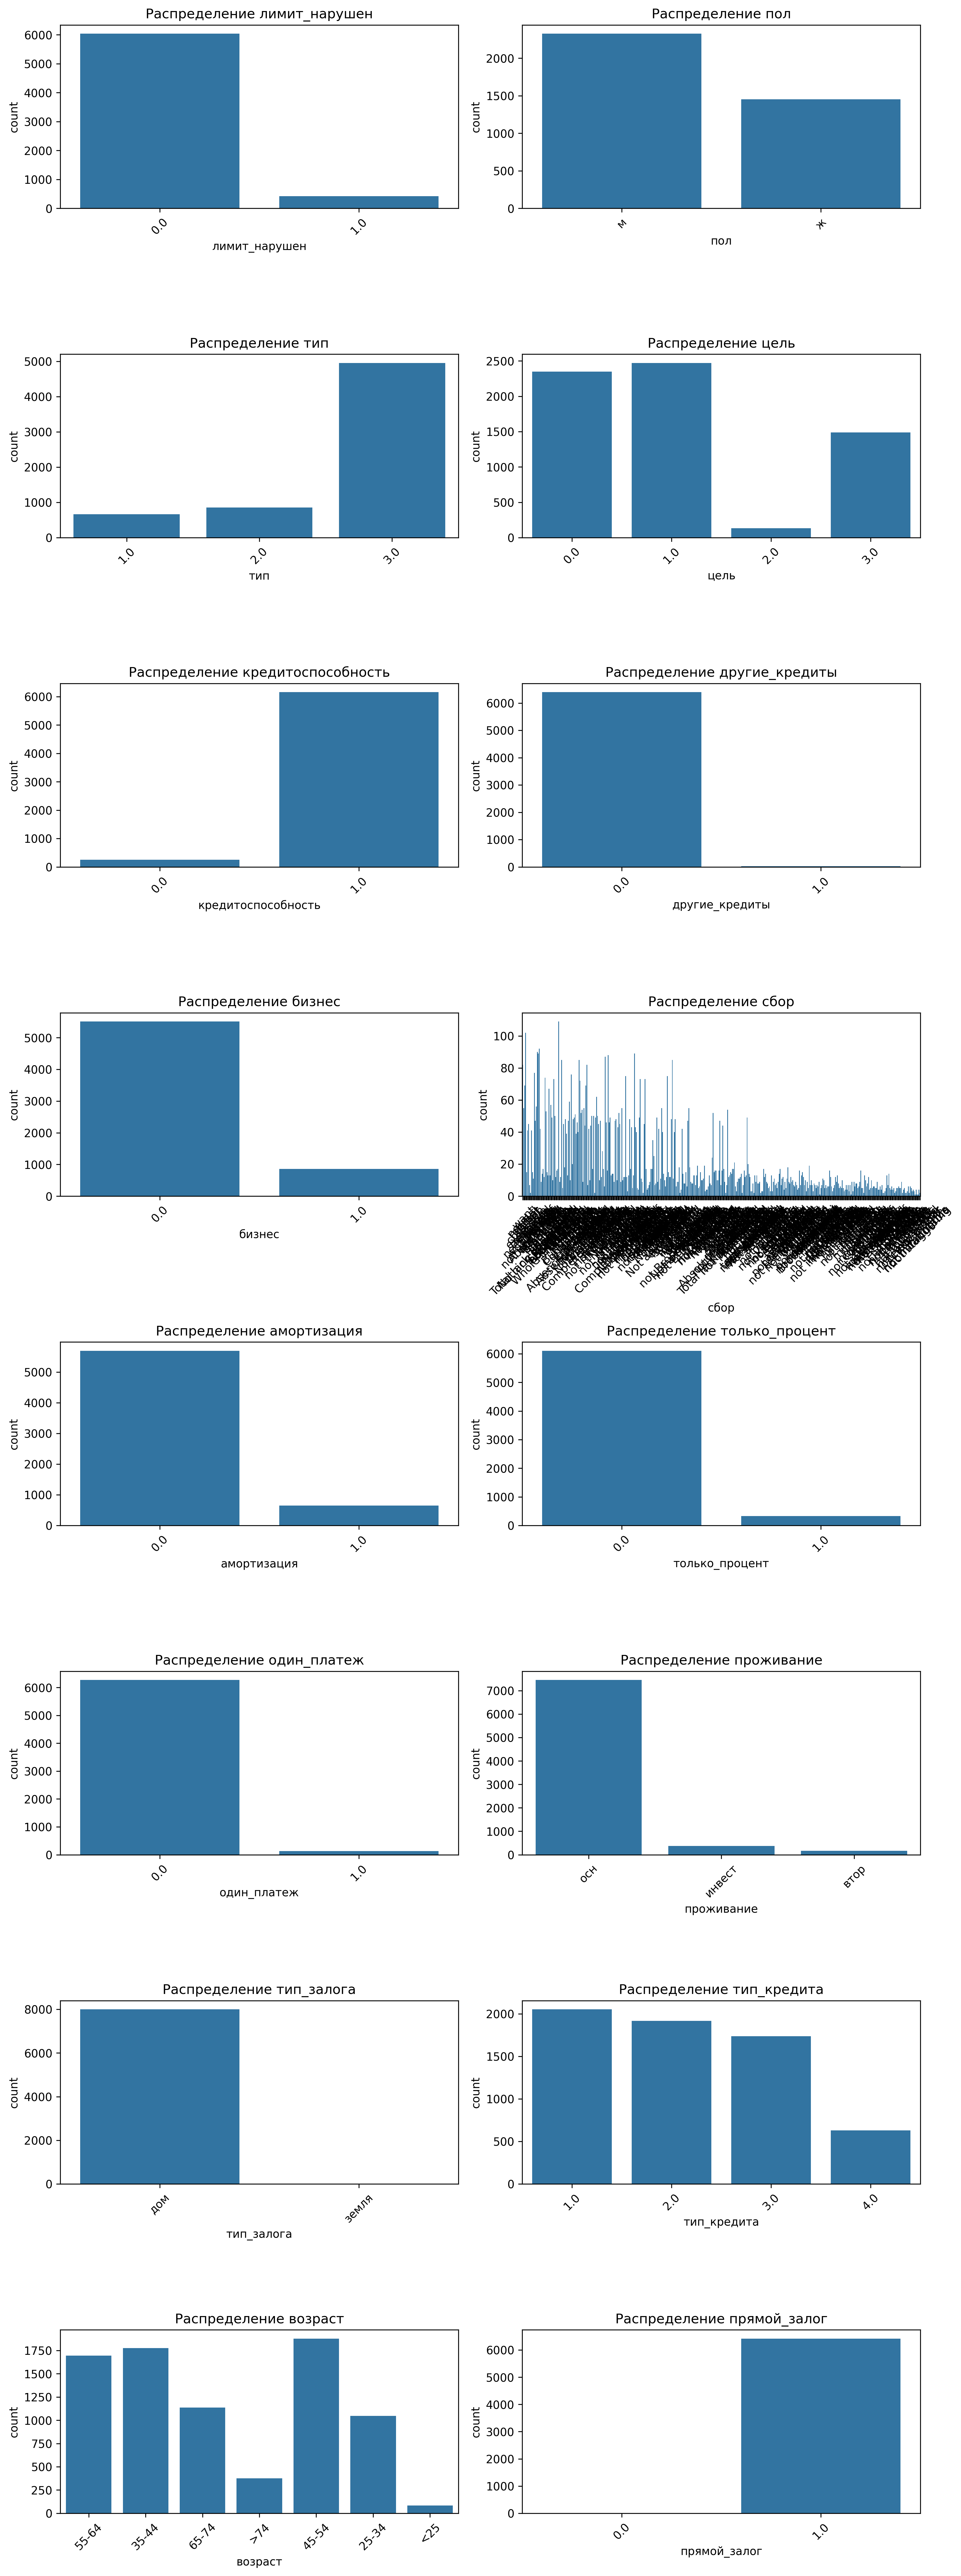

In [56]:
vis.plot_categorical_distributions(loan_data, categorical_features)

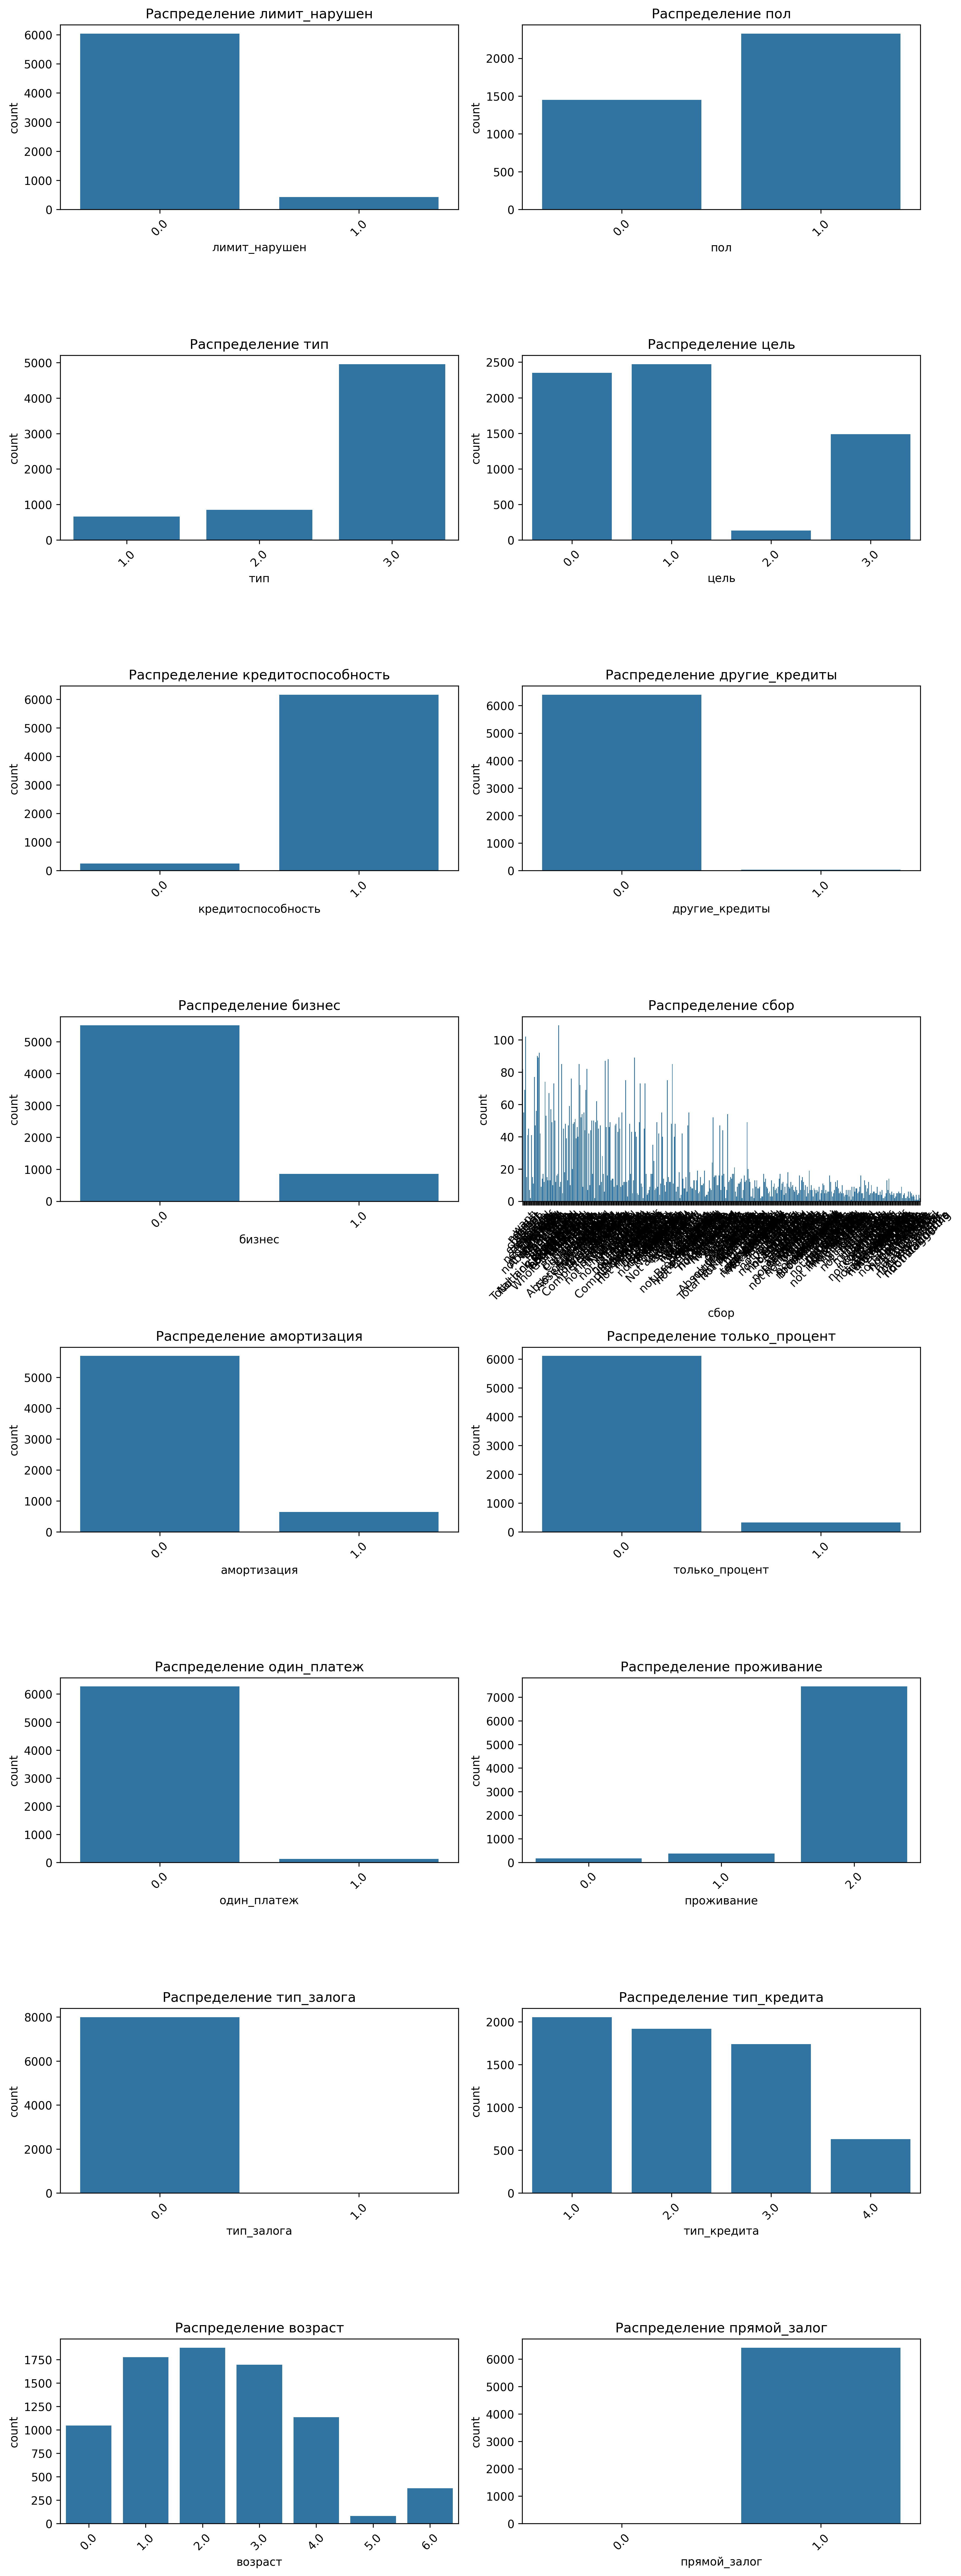

In [69]:
vis.plot_categorical_distributions(loan_data_imp_enc, categorical_features)

In [70]:
loan_data_imp_enc["прямой_залог"].value_counts(dropna=False)

прямой_залог
1.0    6419
NaN    1580
0.0       1
Name: count, dtype: int64

In [72]:
encoder.categories_

[array(['ж', 'м', nan], dtype=object),
 array(['дом', 'земля'], dtype=object),
 array(['25-34', '35-44', '45-54', '55-64', '65-74', '<25', '>74', nan],
       dtype=object),
 array(['втор', 'инвест', 'осн'], dtype=object)]

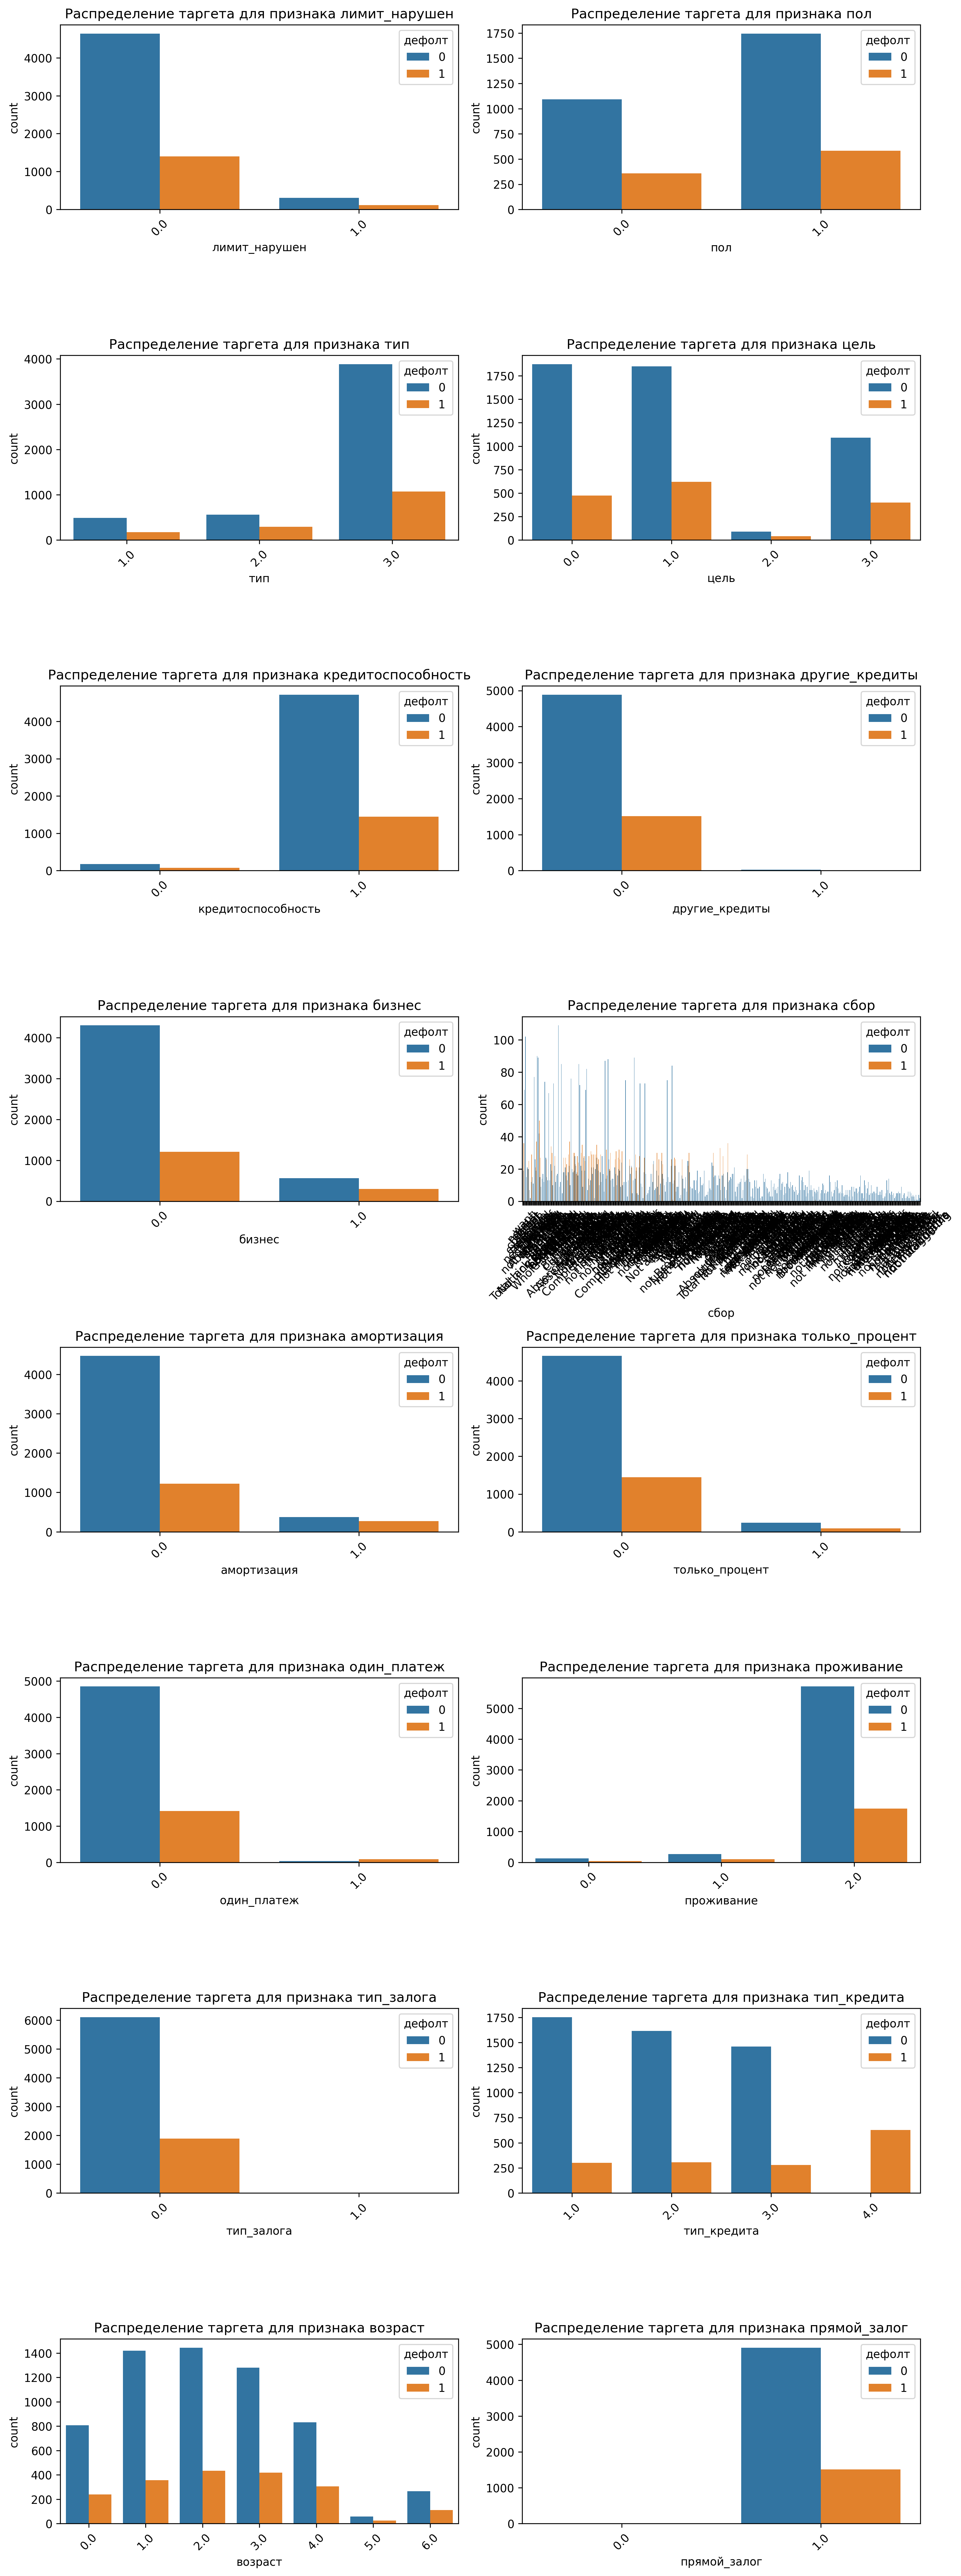

In [71]:
vis.visualize_cat_and_target(loan_data_imp_enc, categorical_features)

In [73]:
loan_data_imp_enc["прямой_залог"] = loan_data_imp_enc["прямой_залог"].fillna(-1)
loan_data_imp_enc["другие_кредиты"] = loan_data_imp_enc["другие_кредиты"].fillna(-1)

In [118]:
loan_data_imp_enc["другие_кредиты"].value_counts()

другие_кредиты
 0.0    6395
-1.0    1575
 1.0      30
Name: count, dtype: int64

In [103]:
s = loan_data_imp_enc.groupby(["сбор", "дефолт"]).size().unstack().fillna(0)
s = s.div(s.sum(axis=1), axis=0)
s.sort_values(by=1, ascending=False)
m = dict(zip(s.index, s[1]))

In [105]:
loan_data_imp_enc["сбор"] = loan_data_imp_enc["сбор"].map(m)

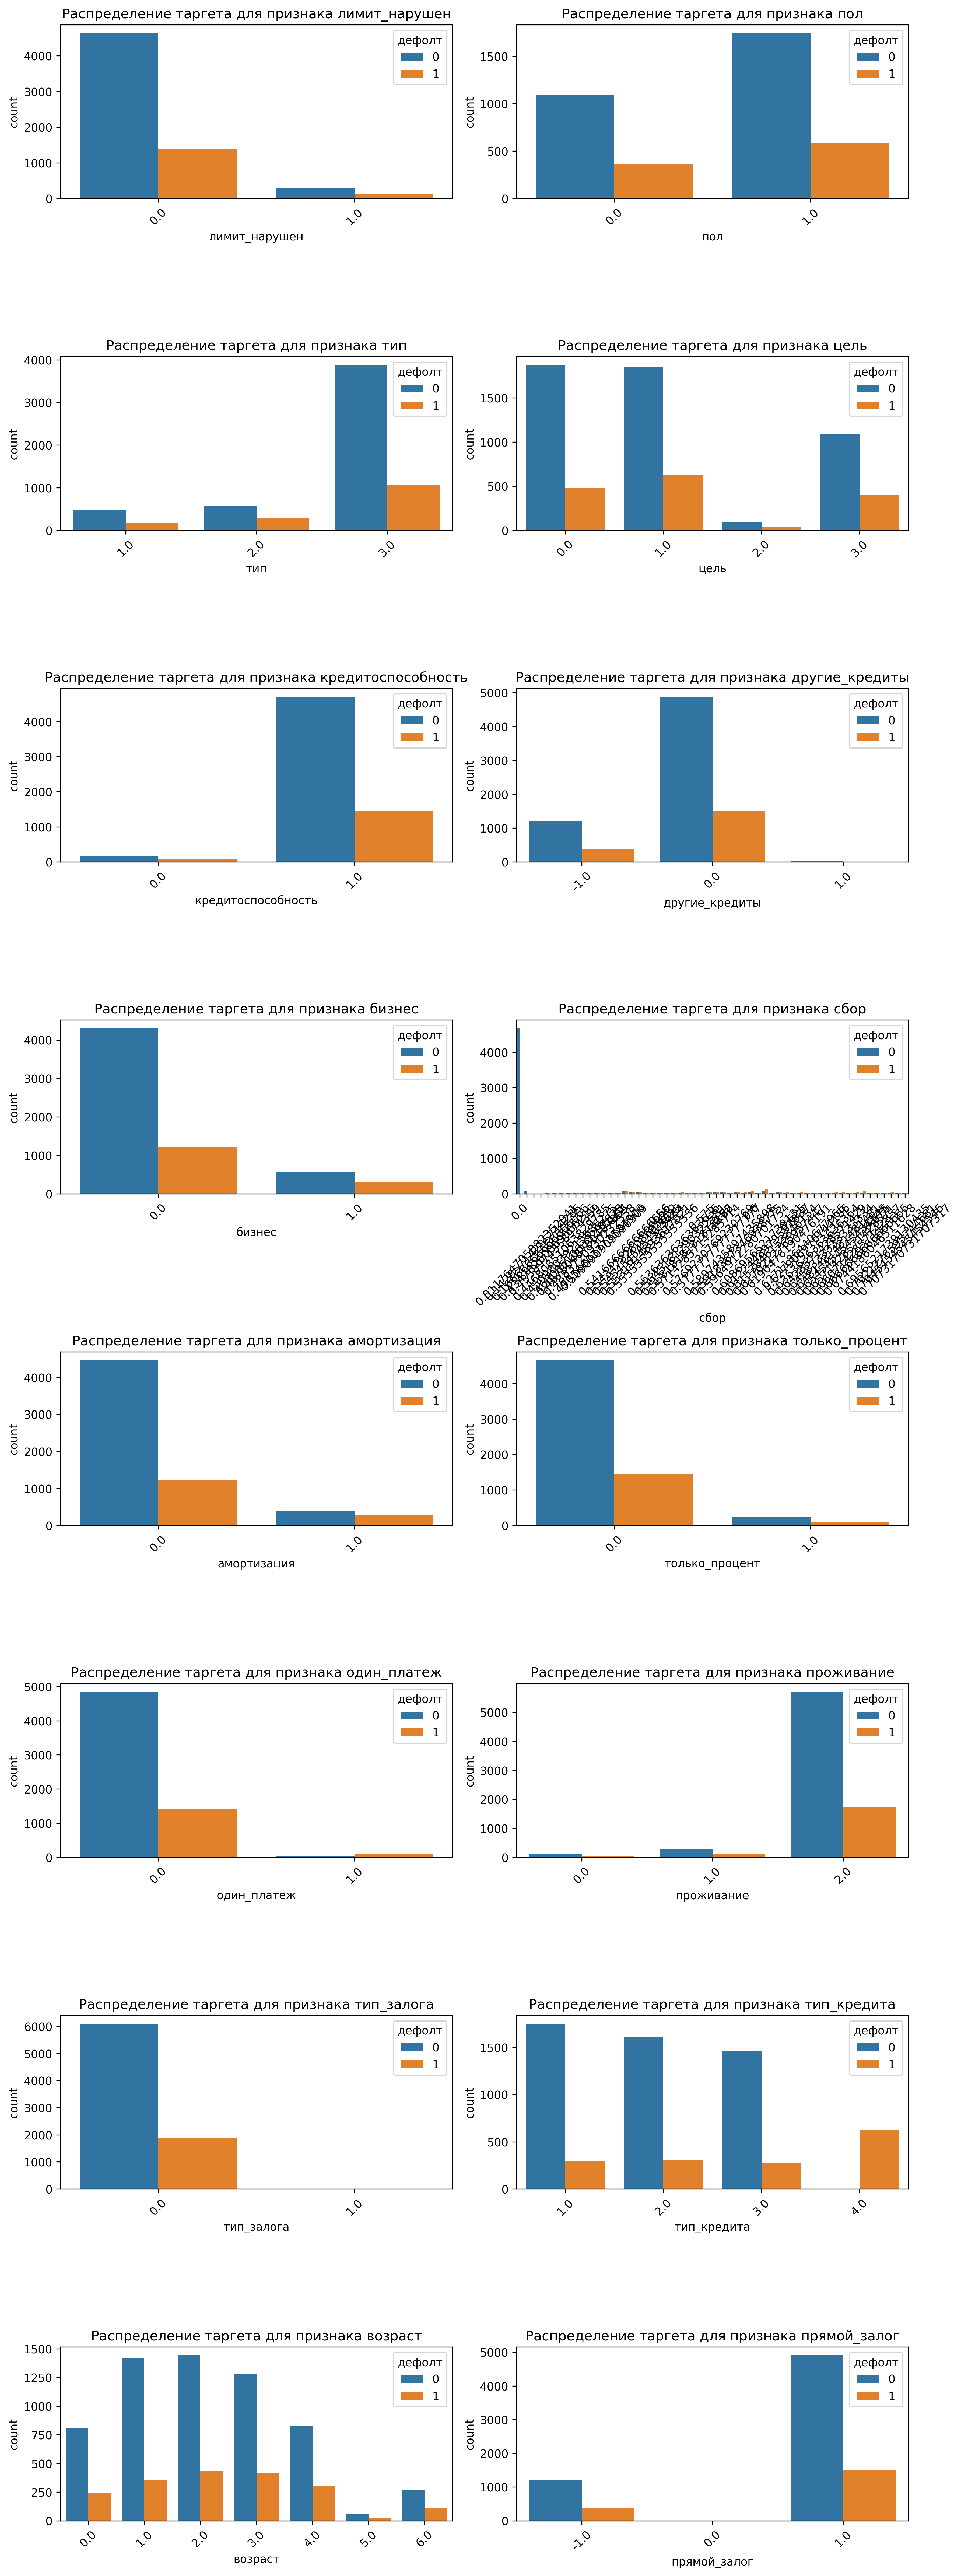

In [122]:
vis.visualize_cat_and_target(loan_data_imp_enc, categorical_features)

In [131]:
def combine_genders(s1, s2, s3, s4):
    combined = pd.Series(index=s1.index, dtype=int)  
    combined[s1] = 0
    combined[s2] = combined.where(combined == 0, 1)  
    combined[s3] = combined.where(combined.isin([0, 1]), 2)  
    combined[s4] = combined.where(combined.isin([0, 1, 2]), 3) 
    
    return combined

In [132]:
couples = loan_data_imp_enc["речь"].str.contains(r"(we|couple)")
male = loan_data_imp_enc["речь"].str.contains(r"(man|male|guy)")
female = loan_data_imp_enc["речь"].str.contains(r"(woman)")
non_binary = loan_data_imp_enc["речь"].str.contains(r"(non-binary)")

new_gender = combine_genders(female, male, couples, non_binary)

C:\Users\nvb\AppData\Local\Temp\ipykernel_18444\3024358107.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  couples = loan_data_imp_enc["речь"].str.contains(r"(we|couple)")
C:\Users\nvb\AppData\Local\Temp\ipykernel_18444\3024358107.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  male = loan_data_imp_enc["речь"].str.contains(r"(man|male|guy)")
C:\Users\nvb\AppData\Local\Temp\ipykernel_18444\3024358107.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  female = loan_data_imp_enc["речь"].str.contains(r"(woman)")
C:\Users\nvb\AppData\Local\Temp\ipykernel_18444\3024358107.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  non_binary

In [136]:
loan_data_imp_enc["пол"] = loan_data_imp_enc["пол"].fillna(new_gender)

In [137]:
loan_data_imp_enc["пол"].isna().sum()

1193

In [138]:
loan_data_imp_enc["пол"].value_counts()

пол
1.0    3509
2.0    1753
0.0    1451
3.0      94
Name: count, dtype: int64

In [140]:
loan_data_imp_enc.isna().sum()

лимит_нарушен          1538
пол                    1193
тип                    1534
цель                   1558
кредитоспособность     1594
другие_кредиты            0
бизнес                 1631
сумма                     0
сбор                      0
срок                      0
амортизация            1662
только_процент         1565
один_платеж            1604
стоимость_имущества       0
проживание                0
тип_залога                0
тип_кредита            1660
кредитный_рейтинг      1614
возраст                   8
прямой_залог              0
дефолт                    0
речь                      0
dtype: int64

In [145]:
imputer2 = KNNImputer(n_neighbors=2)
cols_to_use = loan_data_imp_enc.drop(columns=["речь"]).columns
res = imputer2.fit_transform(loan_data_imp_enc[cols_to_use])

In [147]:
loan_data_imp_enc_imp2 = loan_data_imp_enc.copy()
loan_data_imp_enc_imp2[cols_to_use] = res

In [150]:
loan_data_imp_enc_imp2.isna().sum()

лимит_нарушен          0
пол                    0
тип                    0
цель                   0
кредитоспособность     0
другие_кредиты         0
бизнес                 0
сумма                  0
сбор                   0
срок                   0
амортизация            0
только_процент         0
один_платеж            0
стоимость_имущества    0
проживание             0
тип_залога             0
тип_кредита            0
кредитный_рейтинг      0
возраст                0
прямой_залог           0
дефолт                 0
речь                   0
dtype: int64

In [158]:
loan_data_imp_enc_imp2_no_speech = loan_data_imp_enc_imp2.drop(columns=["речь"])

In [177]:
t = loan_data_imp_enc_imp2[TARGET]
df_train, df_test = train_test_split(
    loan_data_imp_enc_imp2_no_speech, 
    test_size=0.3, 
    random_state=42,
    stratify=t
)

In [179]:
df_train_before_scaling = df_train.copy()
df_test_before_scaling = df_test.copy()

In [180]:
to_scandard = ["сумма", "срок", "стоимость_имущества", "кредитный_рейтинг"]

scaler = StandardScaler()
df_train[to_scandard] = scaler.fit_transform(df_train[to_scandard])
df_test[to_scandard] = scaler.transform(df_test[to_scandard])

In [181]:
df_train

лимит_нарушен  пол  тип  цель  кредитоспособность  другие_кредиты  \
6115            0.0  1.0  3.0   1.0                 1.0             0.0   
6432            0.0  2.0  3.0   0.0                 1.0             0.0   
6133            0.0  1.5  1.0   0.0                 1.0             0.0   
3851            0.0  1.0  3.0   0.0                 1.0             0.0   
3875            0.0  2.0  3.0   0.0                 1.0             0.0   
...             ...  ...  ...   ...                 ...             ...   
3540            0.0  2.0  1.0   0.0                 1.0            -1.0   
1780            0.0  1.0  3.0   1.0                 1.0            -1.0   
5551            0.0  0.5  2.0   0.0                 1.0            -1.0   
5713            0.0  0.0  3.0   0.0                 0.0             0.0   
3771            0.0  2.0  3.0   3.0                 1.0             0.0   

      бизнес     сумма      сбор      срок  ...  только_процент  один_платеж  \
6115     0.0 -0.012770  0.000000  0.428301  ...             0.0          0.0   
6432     0.0  1.351189  0.509091  0.428301  ...             0.0          0.0   
6133     0.0 -0.012770  0.000000  0.428301  ...             0.0          0.0   
3851     0.0  0.936071  0.674419  0.428301  ...             0.0          0.0   
3875     0.0  0.936071  0.000000  0.428301  ...             0.0          0.0   
...      ...       ...       ...       ...  ...             ...          ...   
3540     0.0  0.758163  0.666667  0.428301  ...             0.0          0.0   
1780     0.0  0.105835  0.000000  0.428301  ...             0.0          0.0   
5551     1.0  0.105835  0.600000  0.428301  ...             0.0          0.0   
5713     0.0  0.936071  0.660714 -2.744099  ...             0.0          0.0   
3771     0.0 -0.131375  0.509091  0.428301  ...             0.5          0.0   

      стоимость_имущества  проживание  тип_залога  тип_кредита  \
6115            -0.151767         2.0         0.0          1.5   
6432             0.622168         2.0         0.0          1.0   
6133            -0.399426         2.0         0.0          3.0   
3851             0.467381         2.0         0.0          1.0   
3875             1.086529         2.0         0.0          1.0   
...                   ...         ...         ...          ...   
3540             0.188765         2.0         0.0          3.0   
1780             0.219722         2.0         0.0          1.0   
5551            -0.306554         2.0         0.0          1.0   
5713            -0.445862         2.0         0.0          4.0   
3771            -0.616128         2.0         0.0          3.0   

      кредитный_рейтинг  возраст  прямой_залог  дефолт  
6115          -0.938815      2.0           1.0     0.0  
6432           0.166269      0.0           1.0     0.0  
6133          -0.075754      2.0           1.0     0.0  
3851          -0.368007      1.0           1.0     0.0  
3875          -0.947947      6.0           1.0     0.0  
...                 ...      ...           ...     ...  
3540          -1.431992      2.0           1.0     0.0  
1780          -0.381706      4.0           1.0     0.0  
5551           0.677712      1.0           1.0     0.0  
5713           1.280485      2.0          -1.0     1.0  
3771          -1.578119      0.0           1.0     0.0  

[5600 rows x 21 columns]

In [182]:
from sklearn.svm import SVC

In [183]:
classifier_svc = SVC(probability=True)
X_train, y_train = df_train.drop(columns=[TARGET]), df_train[TARGET]
classifier_svc.fit(X_train, y_train)

SVC(probability=True)

In [184]:
classifier_svc.score(X_train, y_train)

0.9091071428571429

In [185]:
X_val, y_val = df_test.drop(columns=[TARGET]), df_test[TARGET]

In [186]:
classifier_svc.score(X_val, y_val)

0.89125

In [193]:
y_proba_val = classifier_svc.predict_proba(X_val)

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_true=y_val, )

In [211]:
def business_el(df, default_prob):
    return ((df["стоимость_имущества"]*df["прямой_залог"] - df["сумма"]) * default_prob).sum()

In [212]:
def business_exp_profit(df, default_prob):
    # col = df["стоимость_имущества"]*df["прямой_залог"]
    # loss = (df["сумма"] + df["сумма"]*0.1/12*df["срок"]) * default_prob
    # return (col - loss).sum()
    return (
        df["сумма"]*0.1/365*df["срок"]*(1-default_prob) +
        (df["стоимость_имущества"]*df["прямой_залог"] - df["сумма"]) * default_prob
    ).sum()

In [213]:
business_el(df_test_before_scaling, y_proba_val[:, 1])

-40184677.883787856

In [214]:
business_exp_profit(df_test_before_scaling, y_proba_val[:, 1])

20586469.99235314

In [235]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=2)
classifier_knn.fit(X_train, y_train)
y_proba_val = classifier_knn.predict_proba(X_val)
print(
    business_el(df_test_before_scaling, y_proba_val[:, 1]),
    business_exp_profit(df_test_before_scaling, y_proba_val[:, 1]),
    sep="\n"
)

-20201682.441113845
43543750.59935545


In [227]:
from sklearn.neighbors import KNeighborsClassifier

res = [] 
for k in tqdm(range(2, 100)):
    classifier_knn = KNeighborsClassifier(n_neighbors=k)
    classifier_knn.fit(X_train, y_train)
    y_proba_val = classifier_knn.predict_proba(X_val)
    res.append([
        k, 
        business_el(df_test_before_scaling, y_proba_val[:, 1]),
        business_exp_profit(df_test_before_scaling, y_proba_val[:, 1]),
    ])
metrics = pd.DataFrame(res, columns=["k", "el", "ep"])

100%|██████████| 98/98 [00:11<00:00,  8.64it/s]


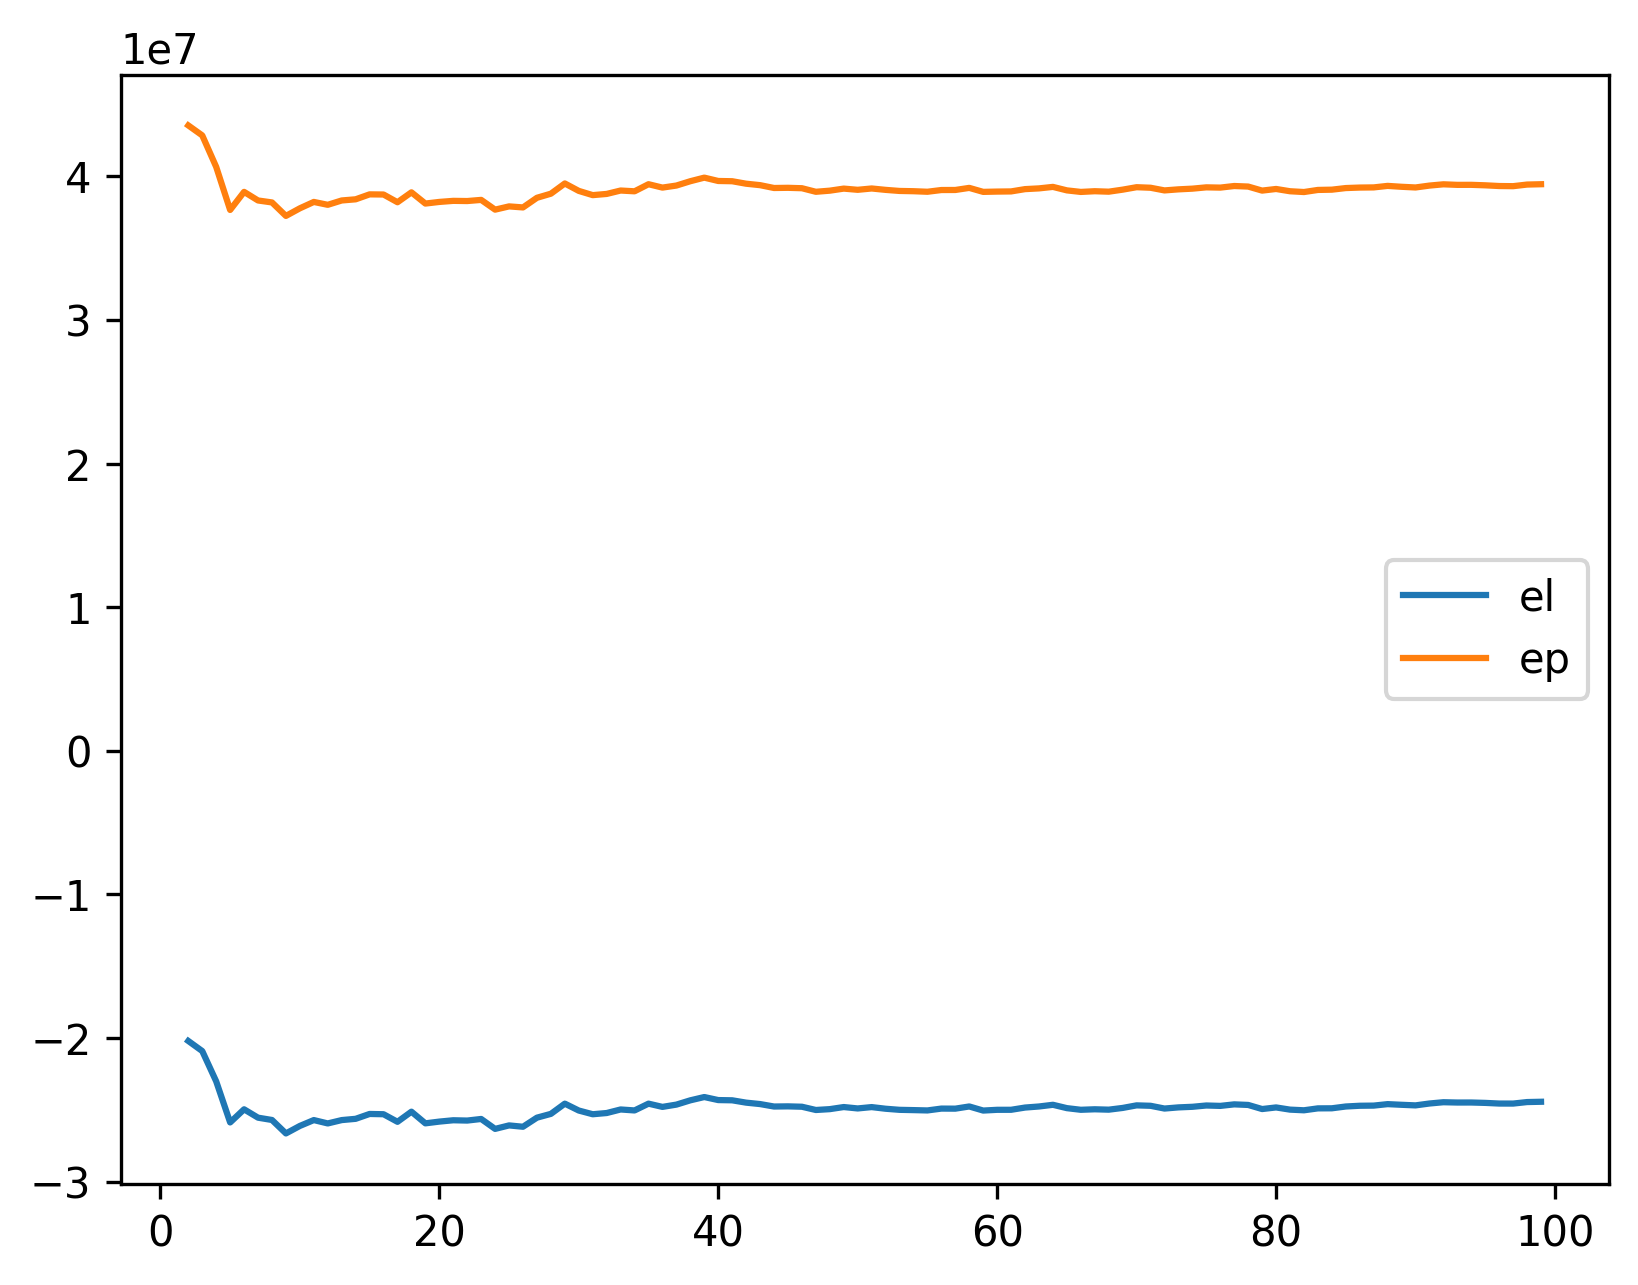

In [231]:
import matplotlib.pyplot as plt

plt.plot(metrics["k"], metrics["el"], label="el")
plt.plot(metrics["k"], metrics["ep"], label="ep")
plt.legend()

In [234]:
from sklearn.ensemble import StackingClassifier

ens = StackingClassifier(estimators=[
    ("knn", KNeighborsClassifier(n_neighbors=2)),
    ("svc", SVC(probability=True)),
])

ens.fit(X_train, y_train)
y_proba_val = ens.predict_proba(X_val)
print(
    business_el(df_test_before_scaling, y_proba_val[:, 1]),
    business_exp_profit(df_test_before_scaling, y_proba_val[:, 1]),
    sep="\n"
)

-36892663.65738942
23932960.45794236


## Final